##### Обработка промышленных данных для поиска аномалий с целью определения отказов для минимизации затрат на обслуживание.
Обрабатывающая промышленность считается тяжелой отраслью, в которой, как правило, используются различные типы тяжелой техники, такие как гигантские двигатели, насосы, трубы, печи, конвейерные ленты, самосвалы, бульдозеры, грейдеры, электрические экскаваторы и т. д. Они часто рассматриваются как наиболее важные активы для их деятельности. Таким образом, целостность и надежность этого оборудования часто находятся в центре внимания их программ управления активами. </br>

Основная причина, по которой они так заботятся об этих активах, заключается в том, что выход из строя этого оборудования часто приводит к производственным потерям, что может привести к потерям в сотни тысяч долларов, если не в миллионы, в зависимости от размера и масштаба операций. Так что это довольно серьезная задача для менеджера по техническому обслуживанию производственного предприятия — запустить надежную структуру управления активами с высококвалифицированными инженерами по надежности, чтобы обеспечить надежность и доступность этих критически важных активов. </br>

Таким образом, способность заблаговременно обнаруживать аномалии и снижать риски является очень ценной функцией, которая в дальнейшем позволяет предотвратить незапланированные простои, ненужное техническое обслуживание (обслуживание по состоянию или обязательное обслуживание), а также обеспечивает более эффективный способ управления критическими компонентами для этих компонентов. ресурсы. Производственные потери из-за незапланированных простоев, затраты на ненужное техническое обслуживание и наличие избытка или нехватки критически важных компонентов выражаются в серьезных величинах в денежном выражении.

In [17]:
import pandas as pd

In [18]:
path = '/Users/alinakozyreva/Documents/MIPT/00_Diploma/novelty_detection/data/multi_dimensional'


In [19]:
df = pd.read_csv(path+'/sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [20]:
df['machine_status'].value_counts(dropna=False).head()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [21]:
df['sensor_15'].value_counts(dropna=False).head()

NaN    220320
Name: sensor_15, dtype: int64

Очитска данных:
- Удалить лишние столбцы
- Удалить дубликаты
- Обработка пропущенных значений
- Преобразование типов данных в правильный тип данных

In [22]:
df = df.drop_duplicates()
del df['sensor_15']
del df['Unnamed: 0']

import warnings
warnings.filterwarnings("ignore")


Обработка отсутствующих значений:
- посмотреть столбцы с отсутствующими значениями 
- определить, какой процент данных отсутствует
- заменить некоторые пропущенные значения их средним значением, а остальные отбросить. 

In [23]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

percent
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327

In [24]:
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [25]:
calc_percent_NAs(df).head(10)

percent
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327
sensor_32  0.000309
sensor_18  0.000209
sensor_17  0.000209
sensor_22  0.000186
sensor_25  0.000163
sensor_16  0.000141
sensor_45  0.000123

In [26]:
df = df.dropna()

Теперь набор данных включает 52 датчика, столбец состояния машины, который содержит три класса (НОРМАЛЬНОЕ, НЕИСПРАВНОЕ, ВОССТАНОВЛЕНИЕ), которые представляют собой нормальное рабочее состояние, неисправное состояние и состояние восстановления насоса соответственно, а затем столбец даты и времени, который представляет отметку времени.

In [27]:
df.head(5)

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 53 columns]

In [28]:
# Преобразуем тип данных столбца timestamp в формат datatime
import warnings
warnings.filterwarnings("ignore")
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [29]:
df = df.set_index('timestamp')
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
timestamp                            
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 52 columns]

Exploratory Data Analysis (EDA)

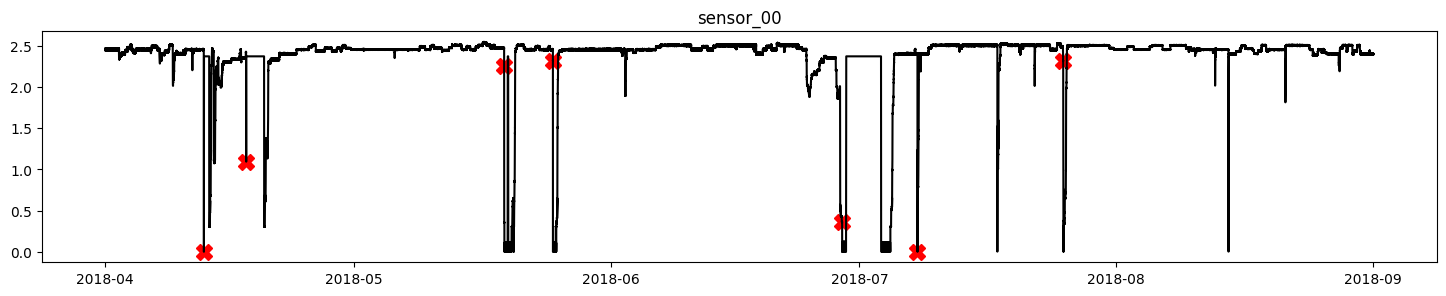

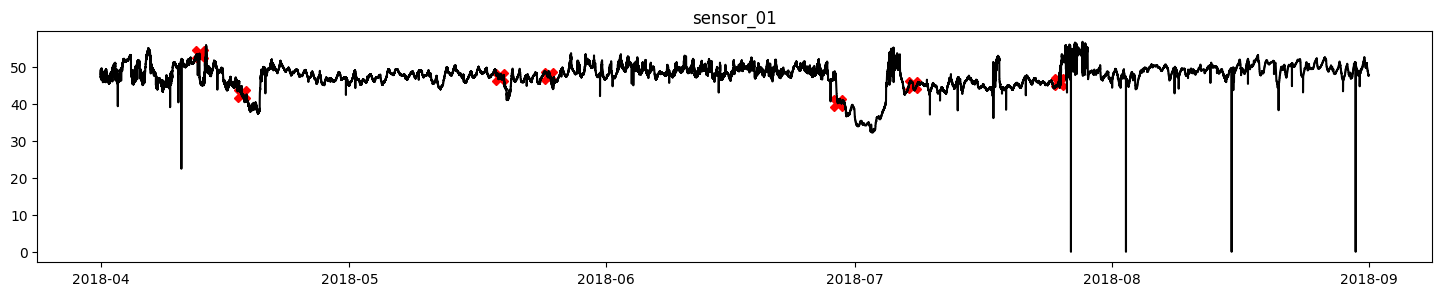

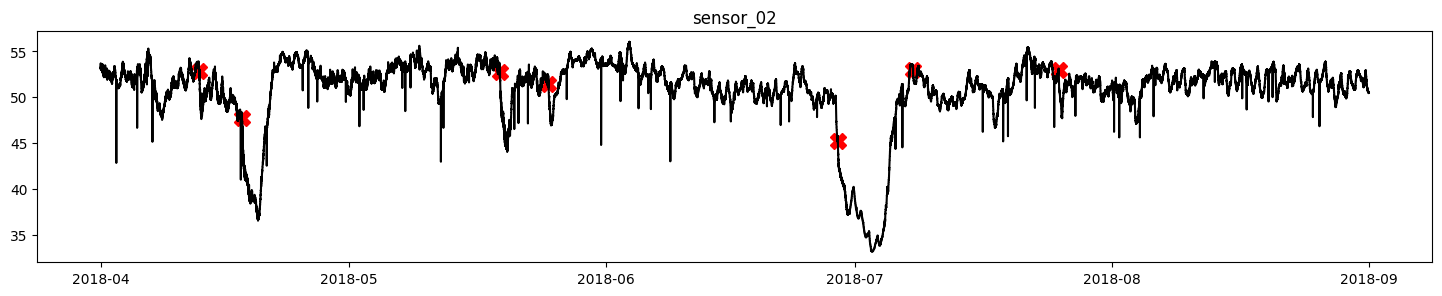

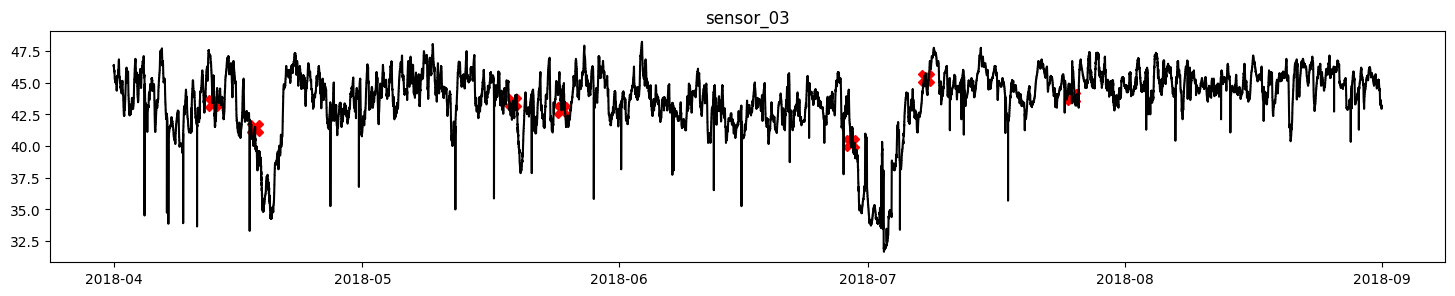

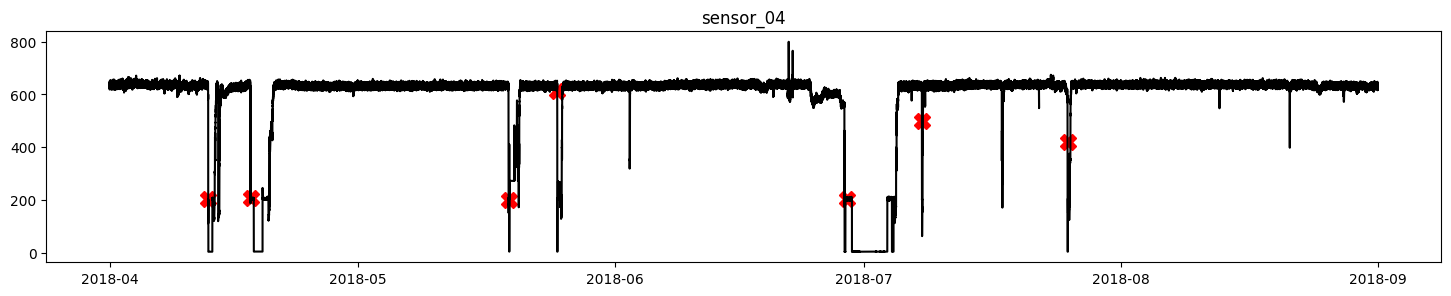

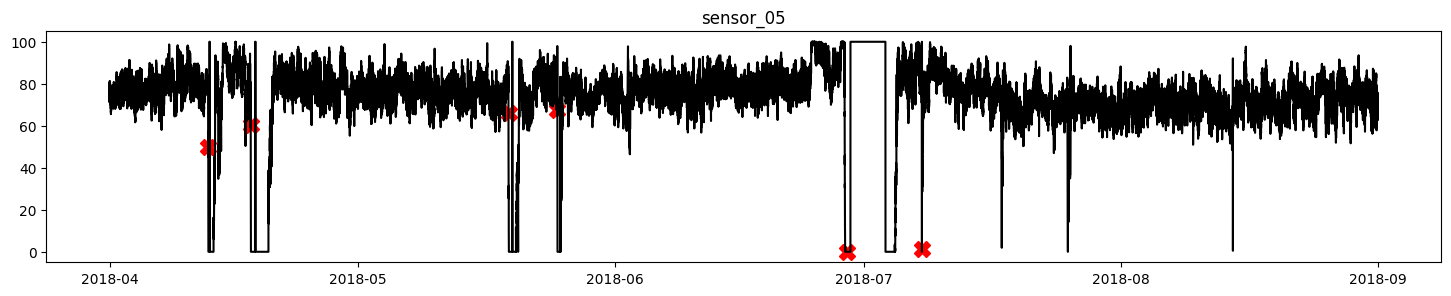

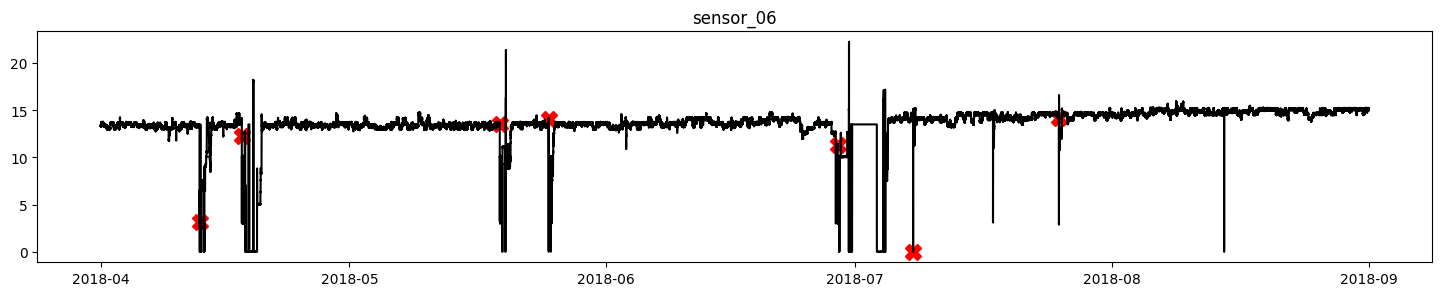

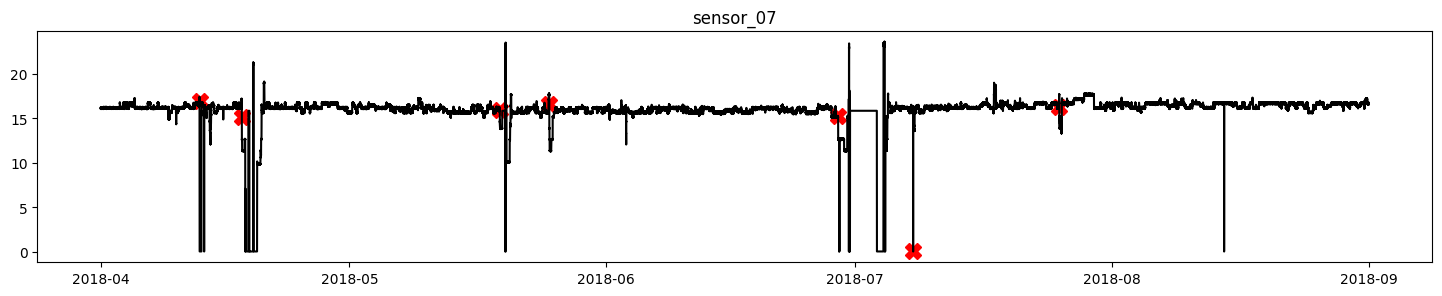

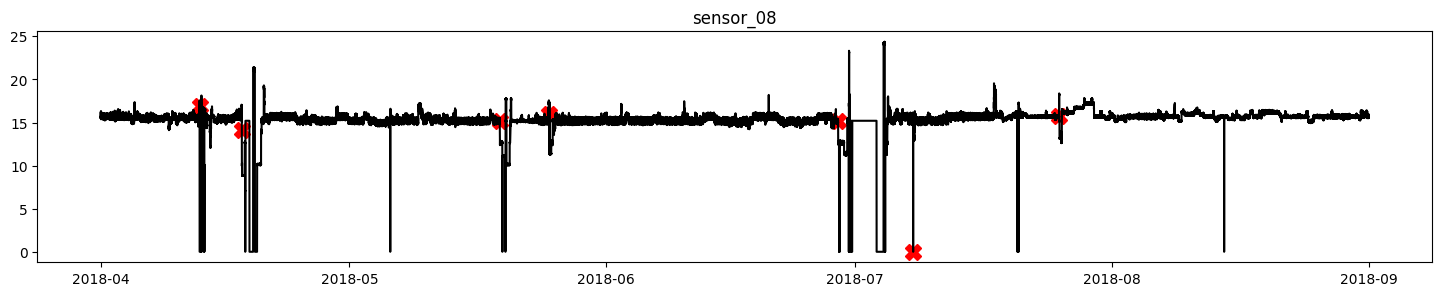

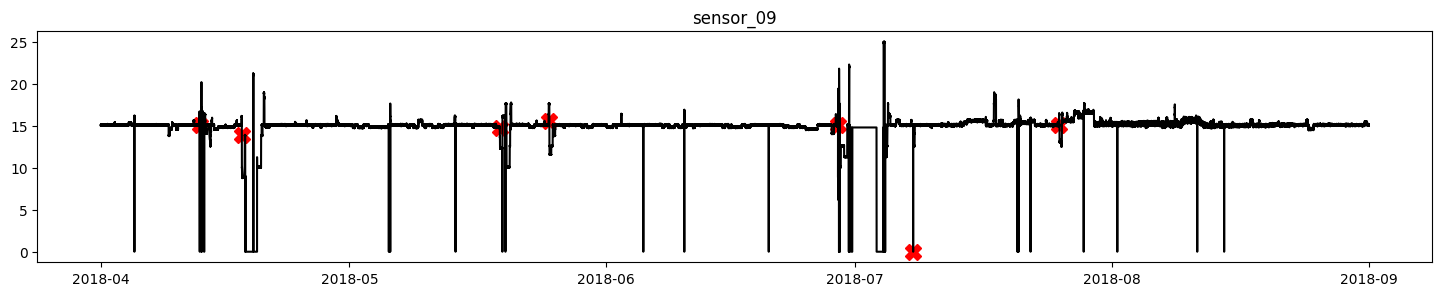

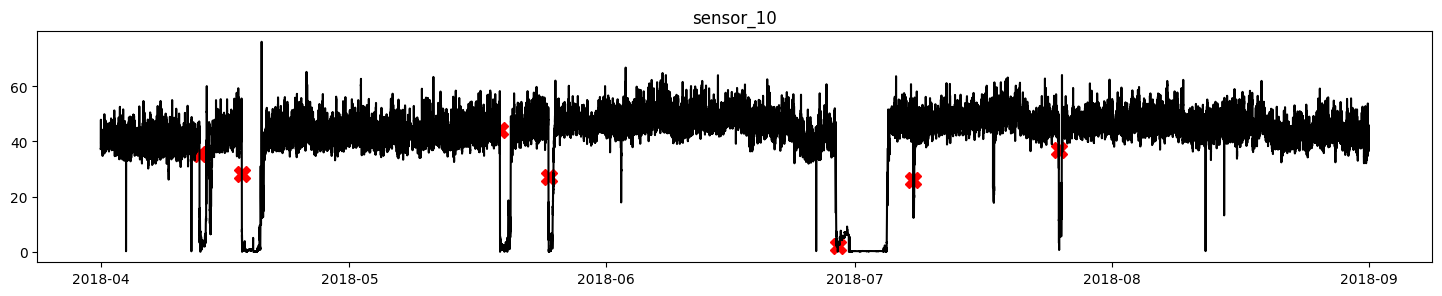

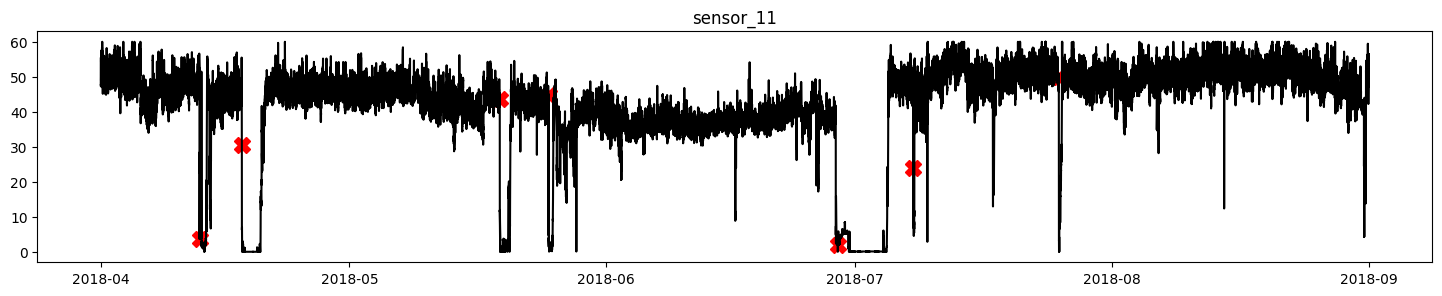

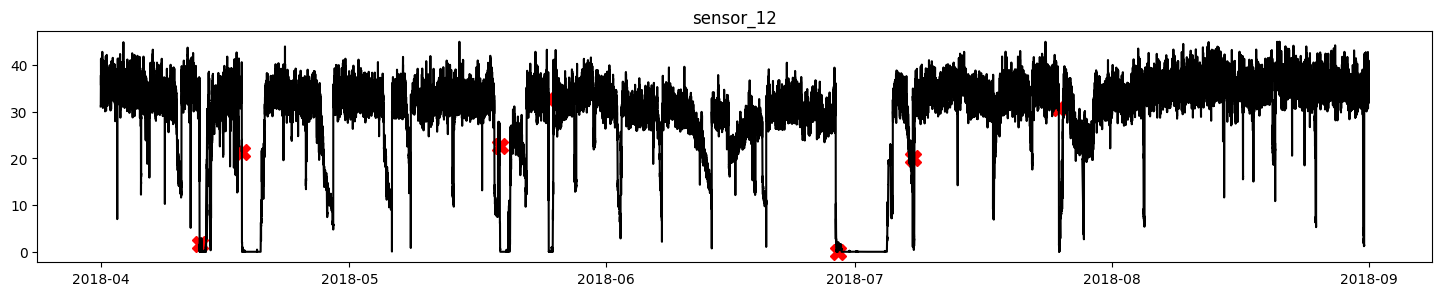

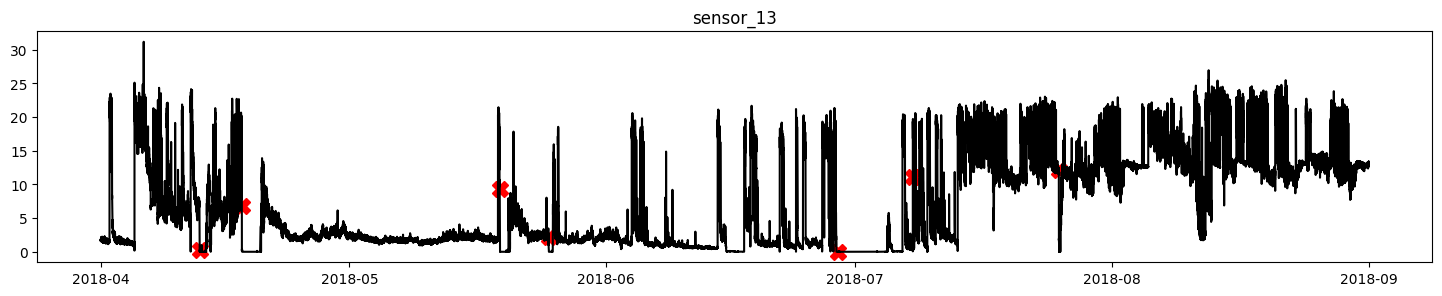

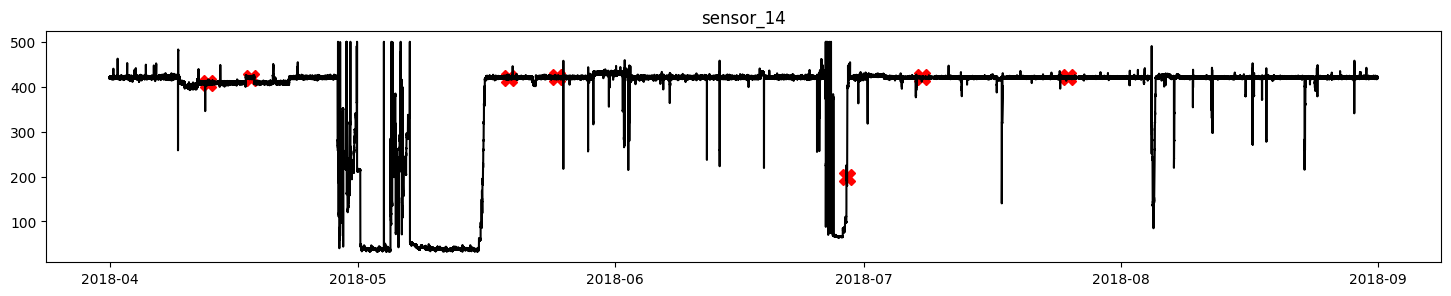

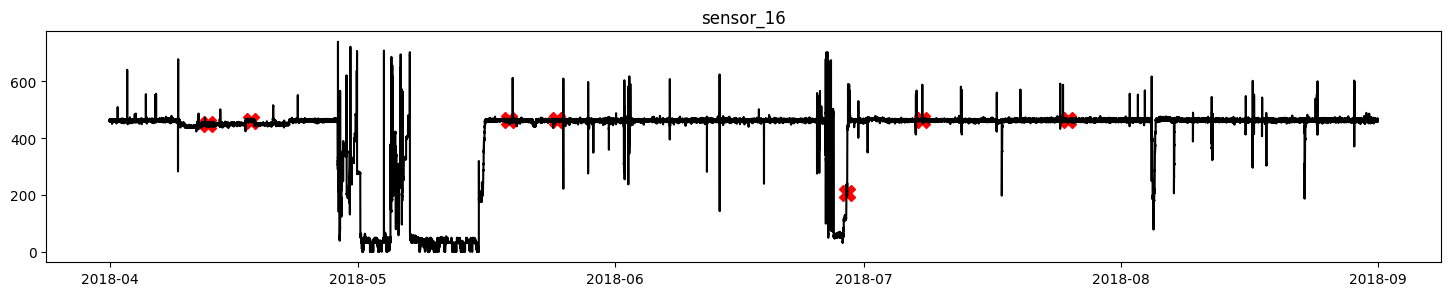

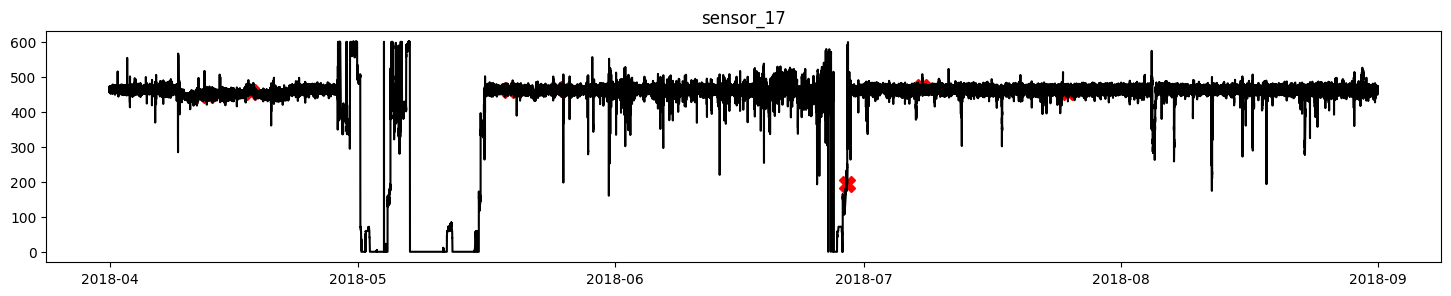

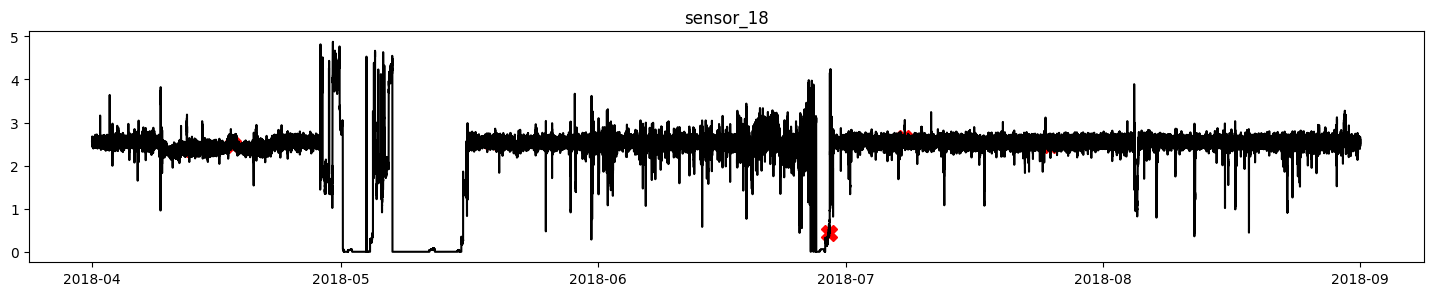

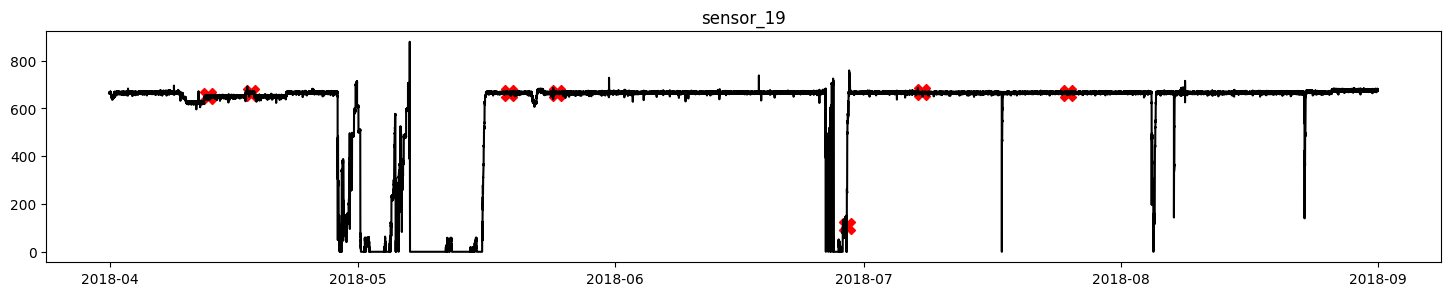

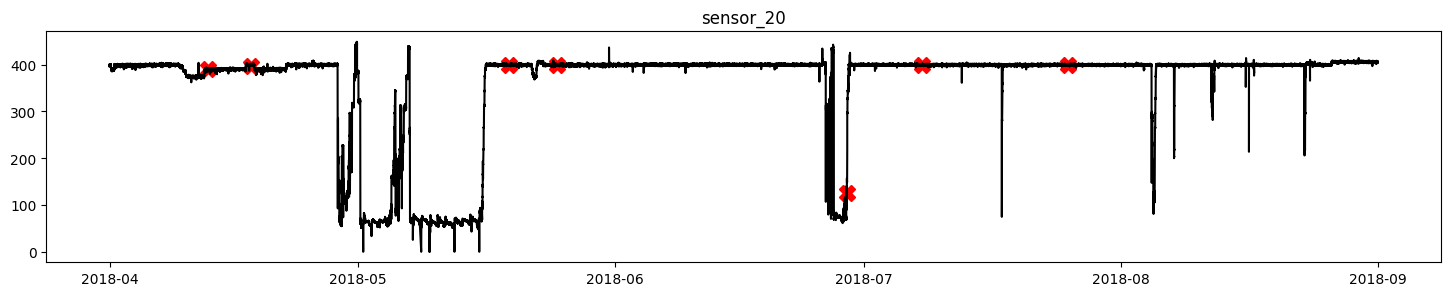

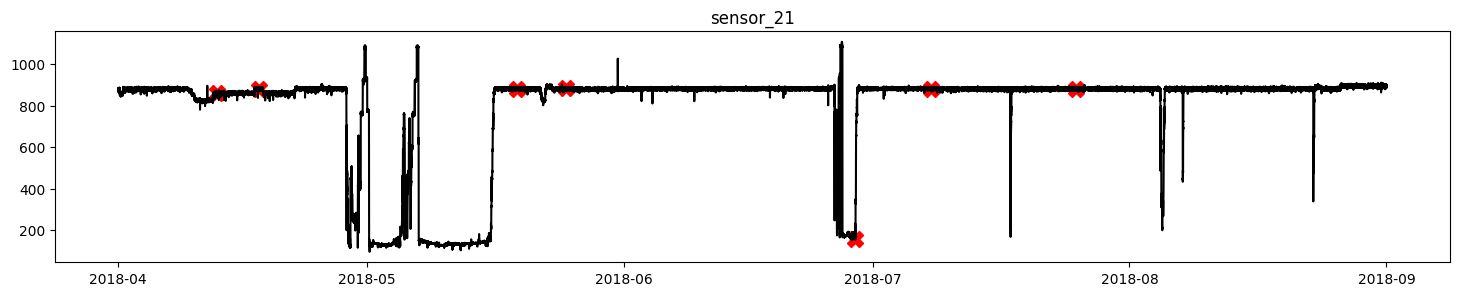

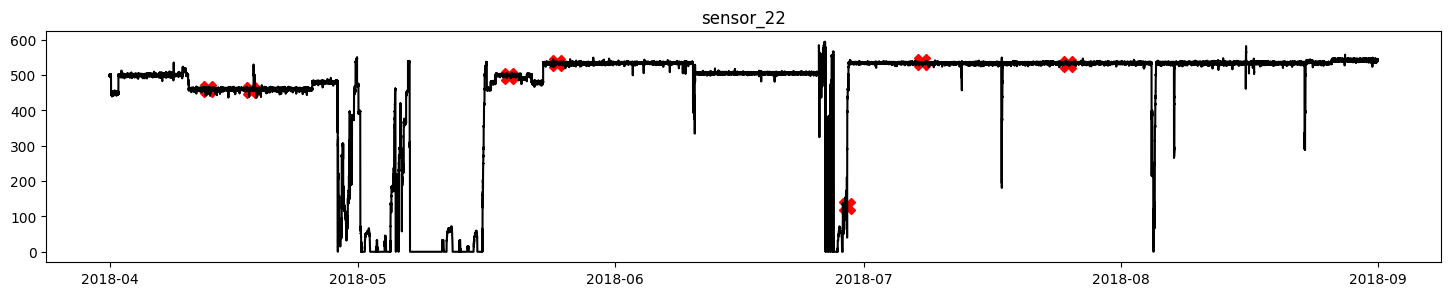

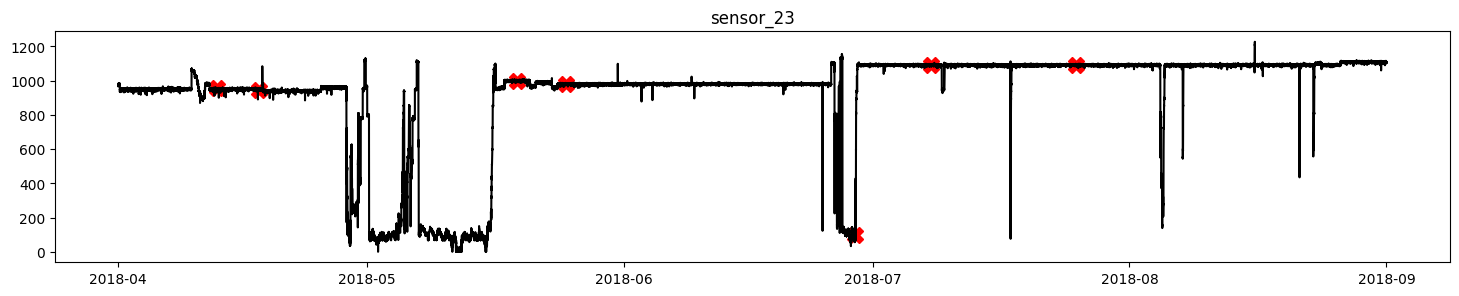

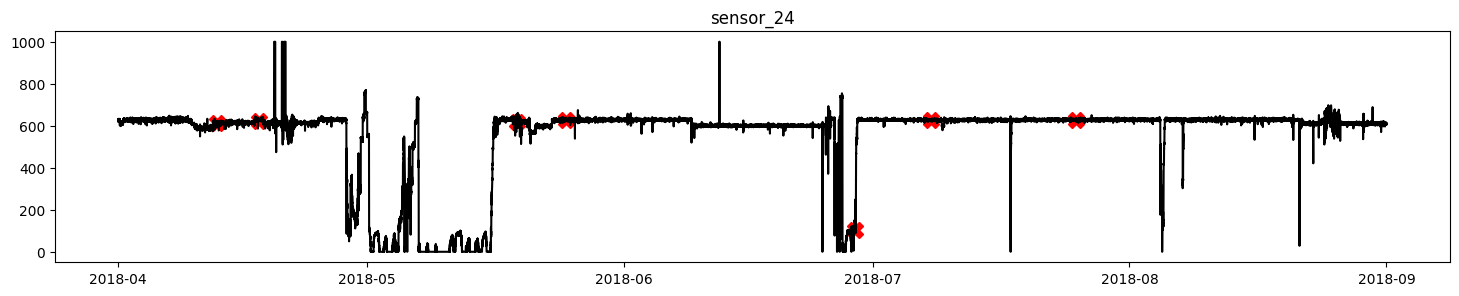

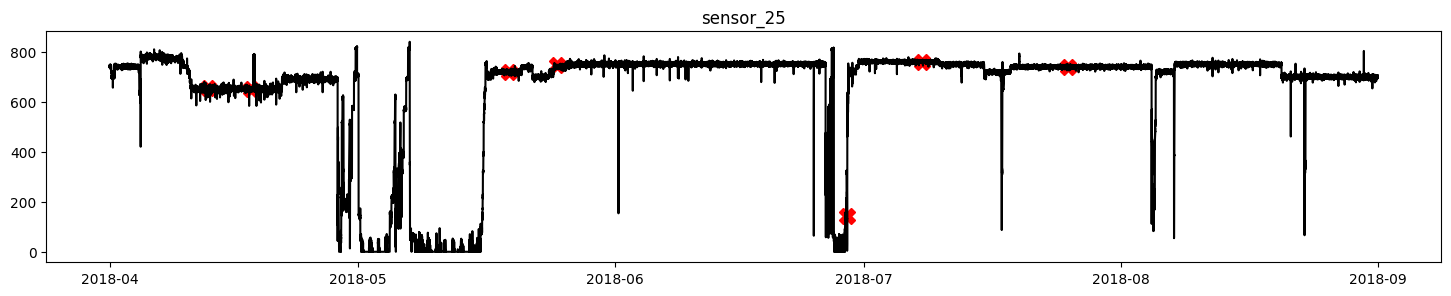

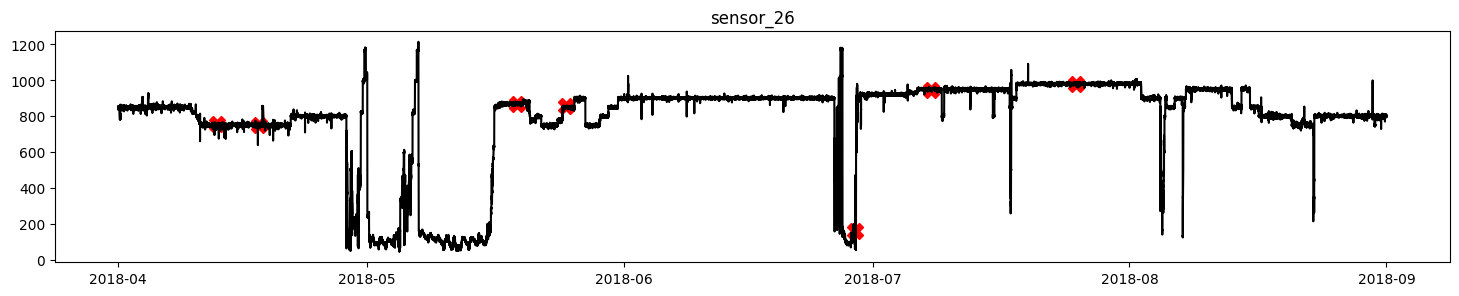

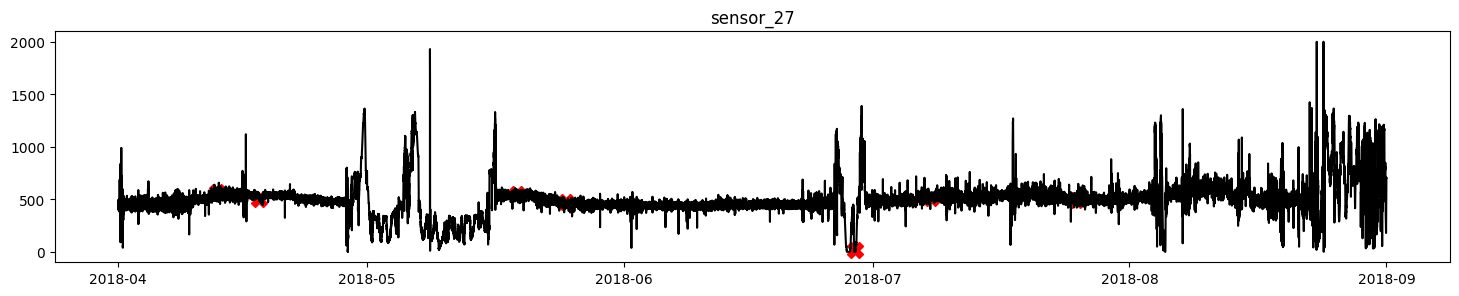

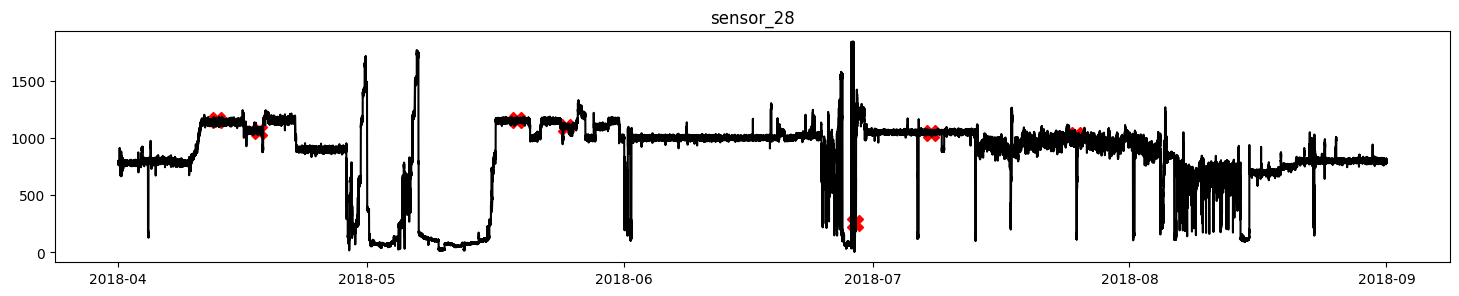

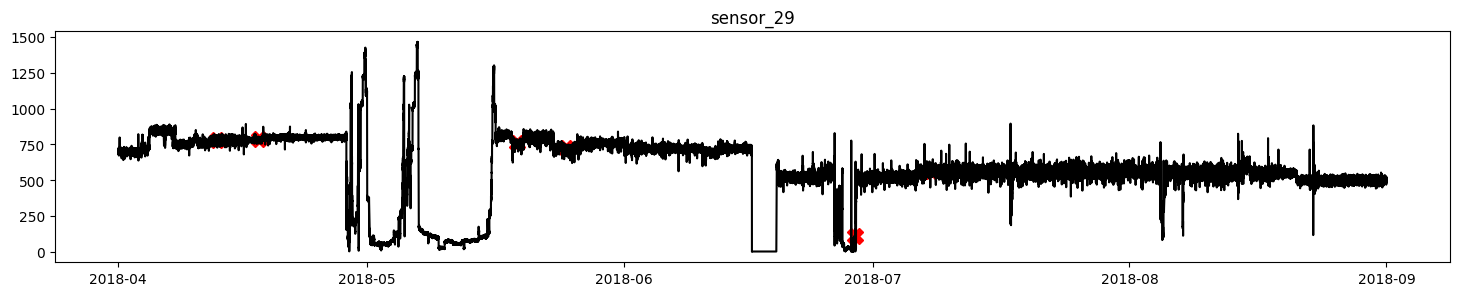

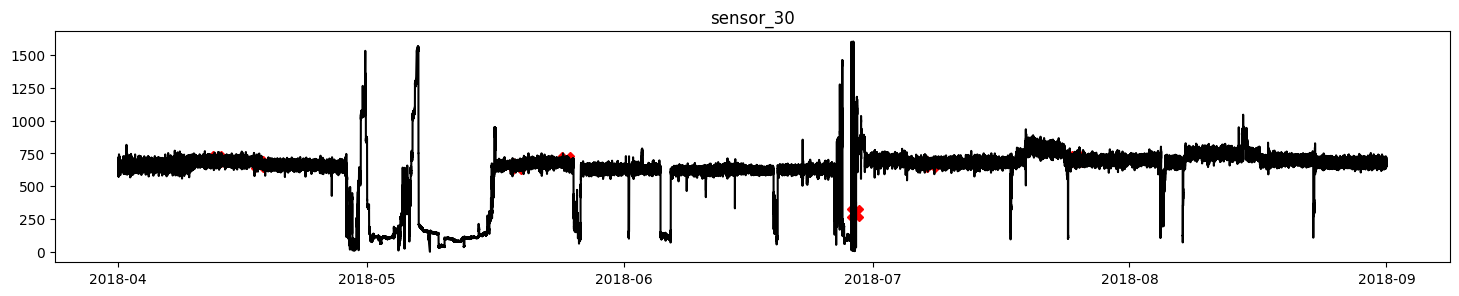

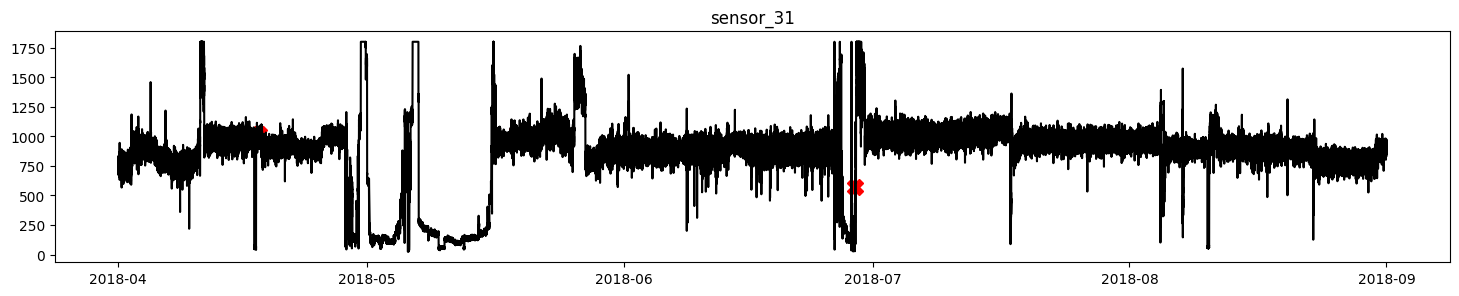

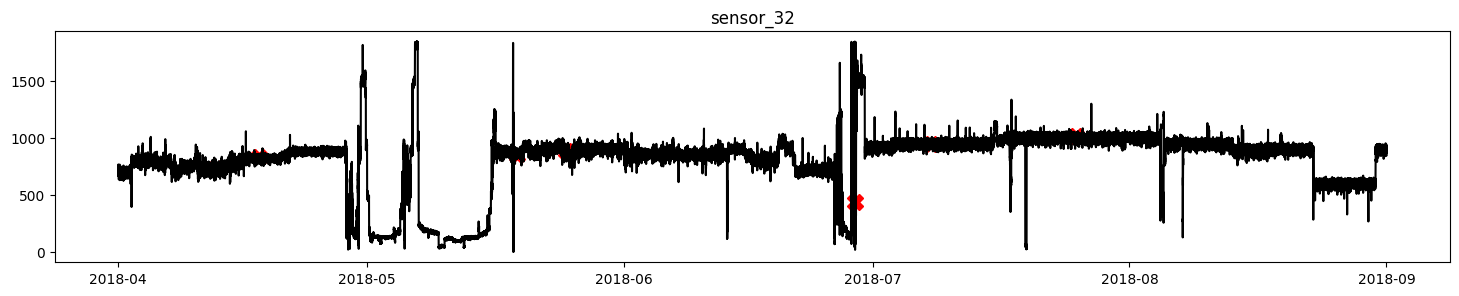

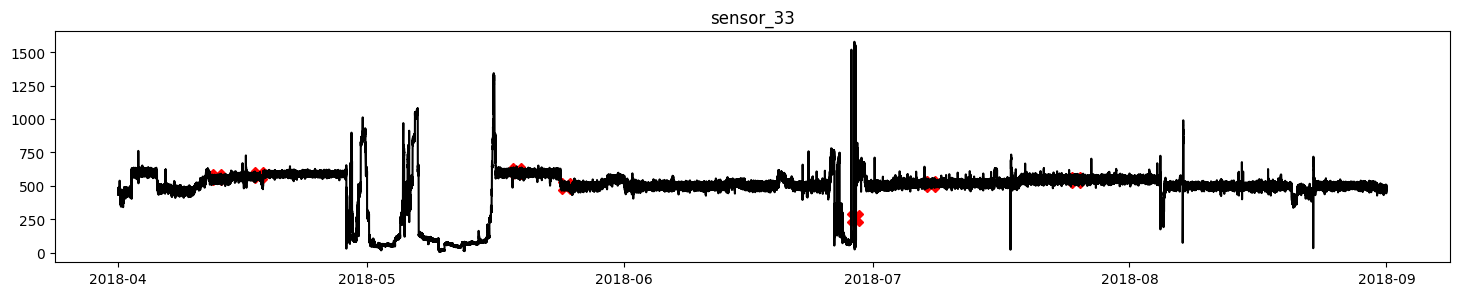

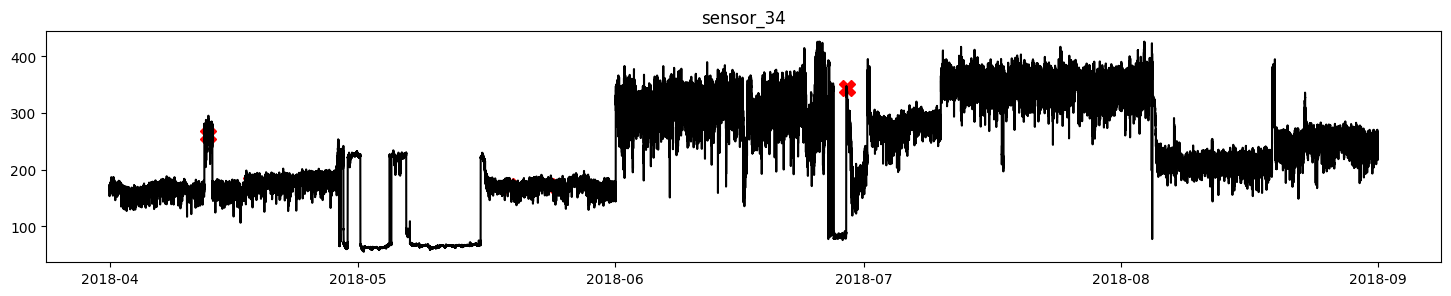

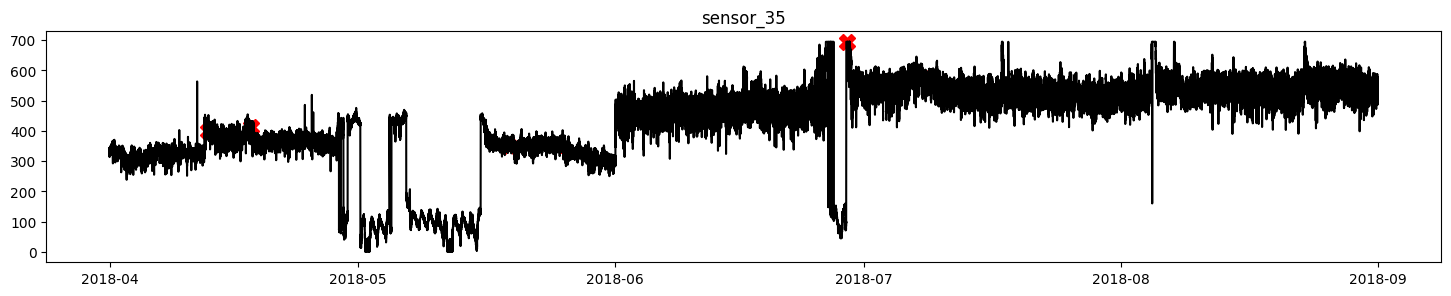

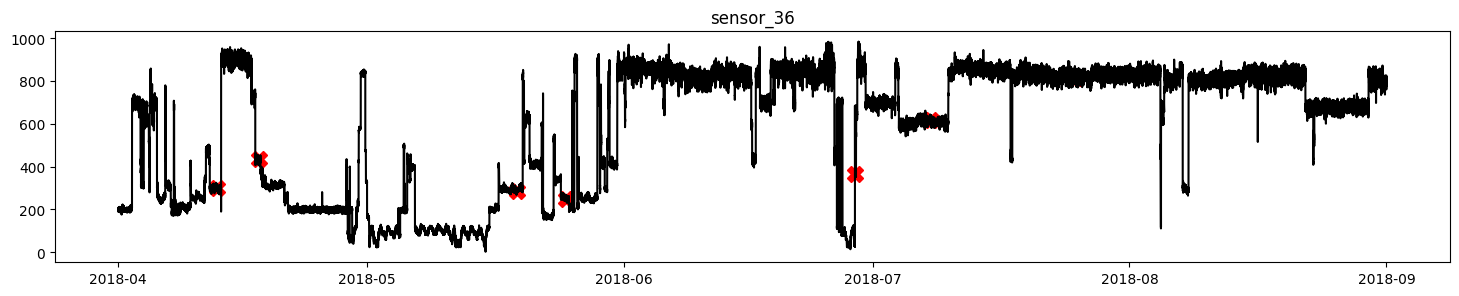

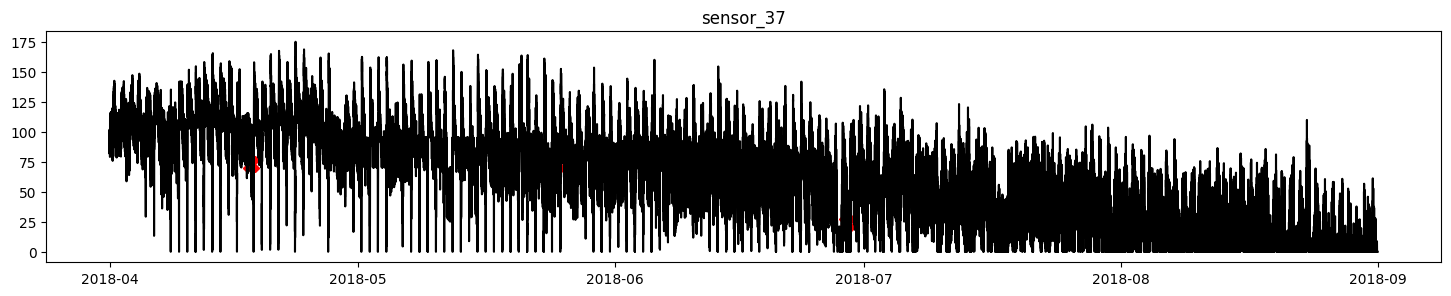

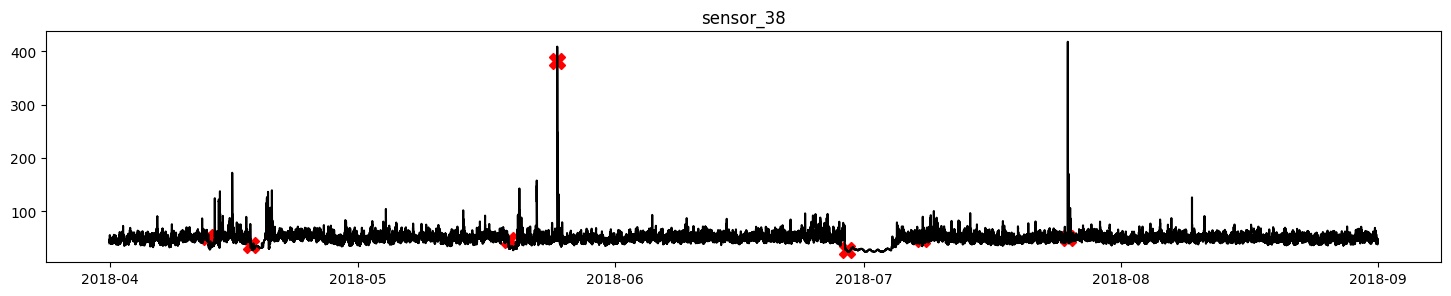

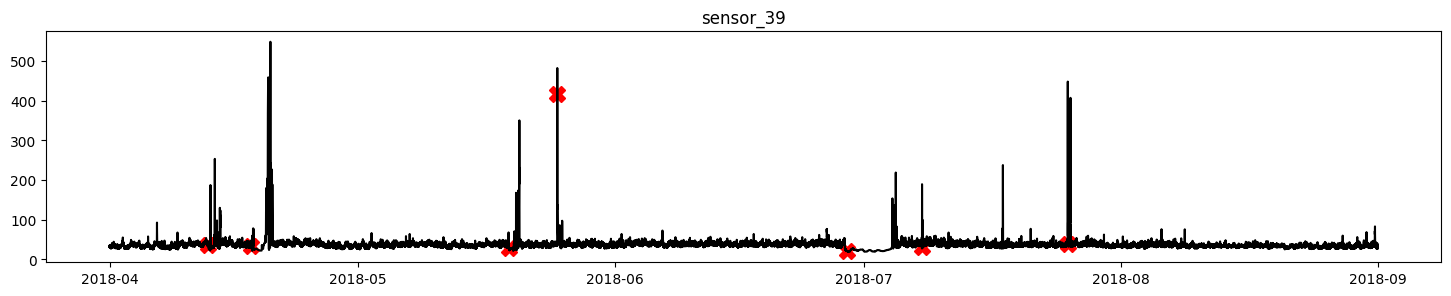

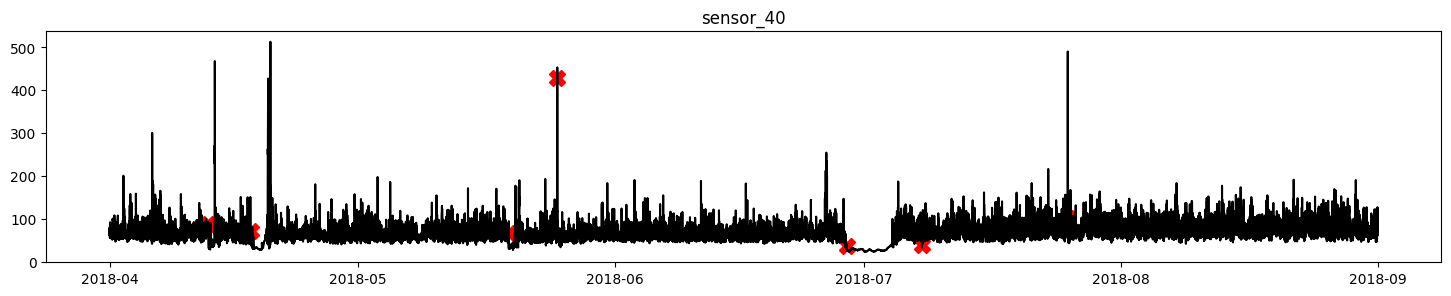

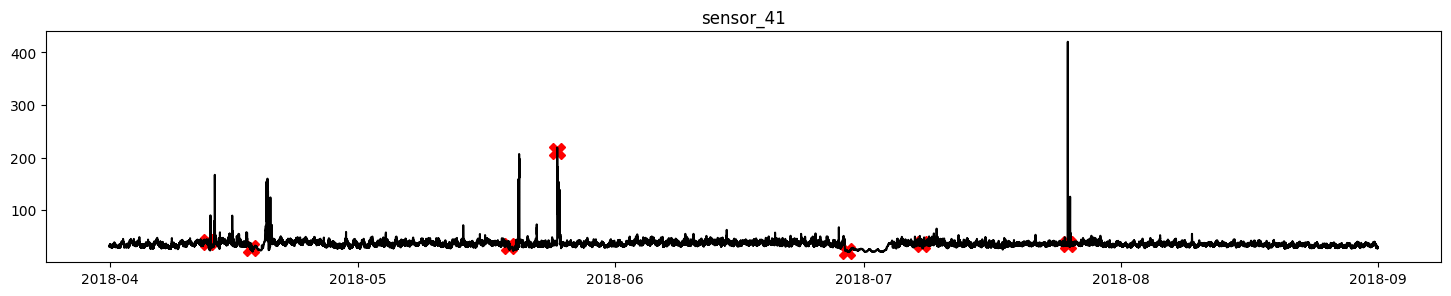

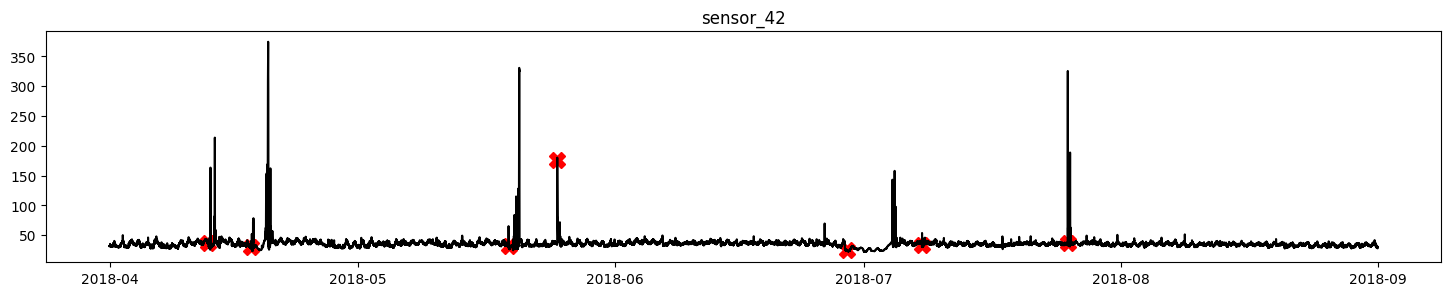

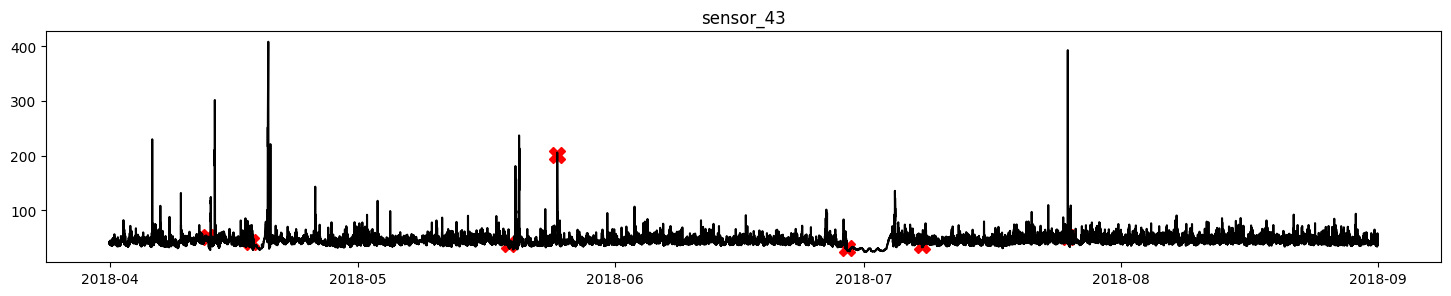

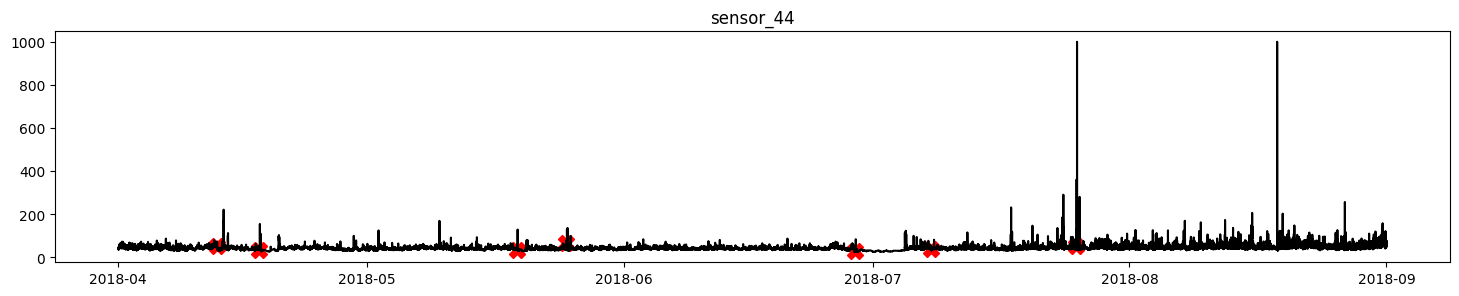

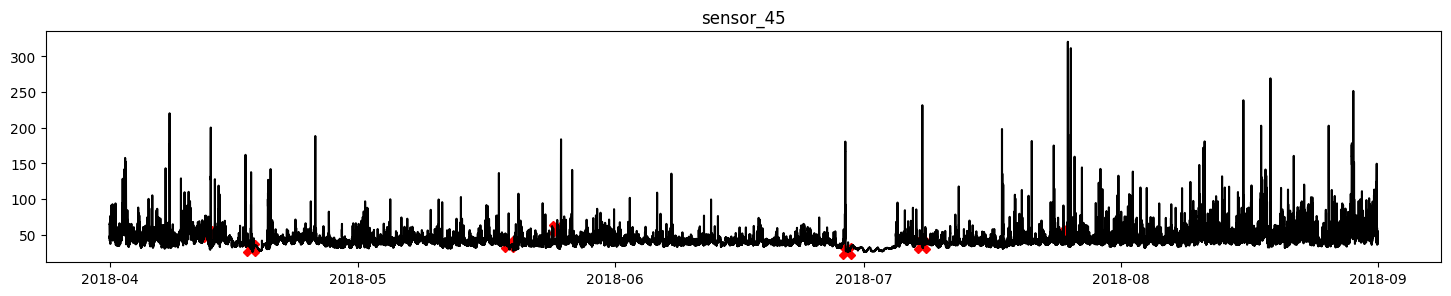

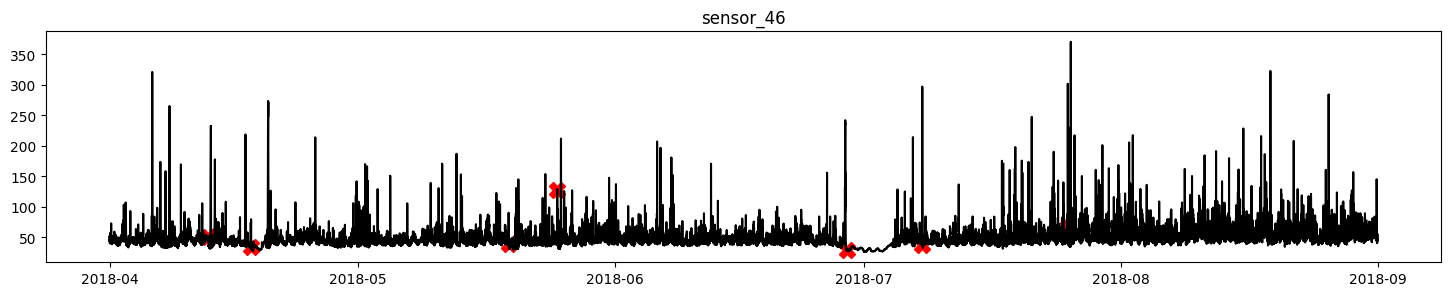

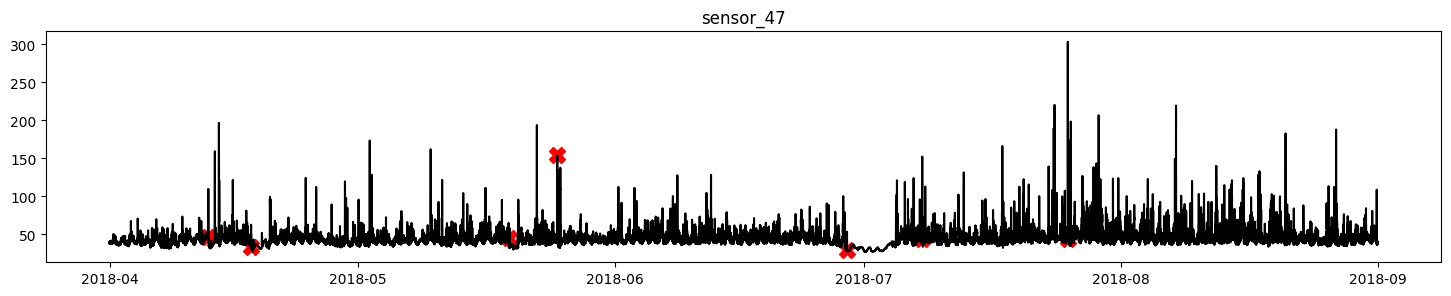

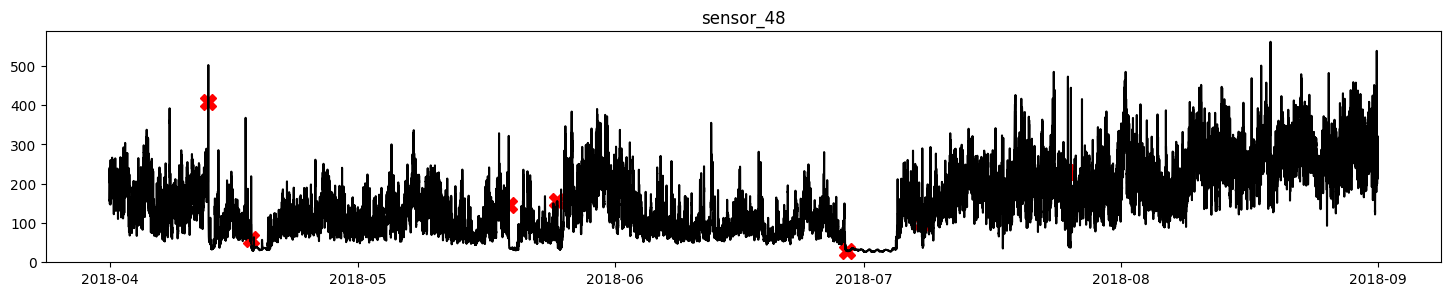

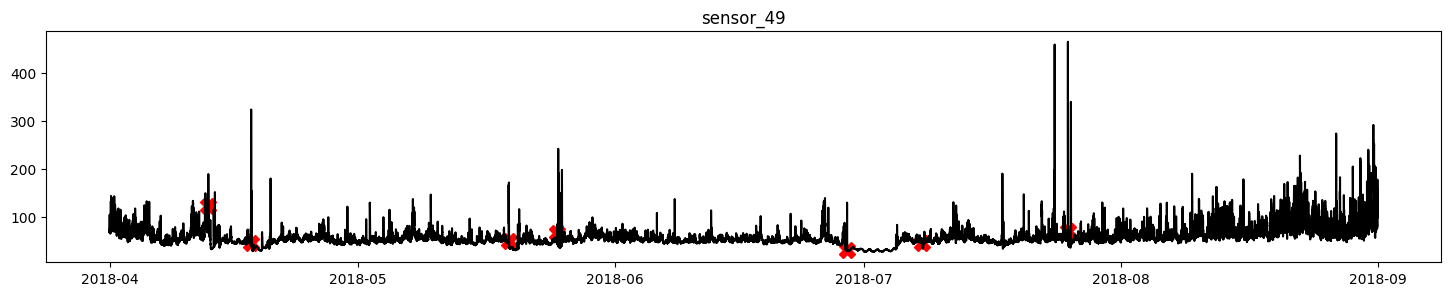

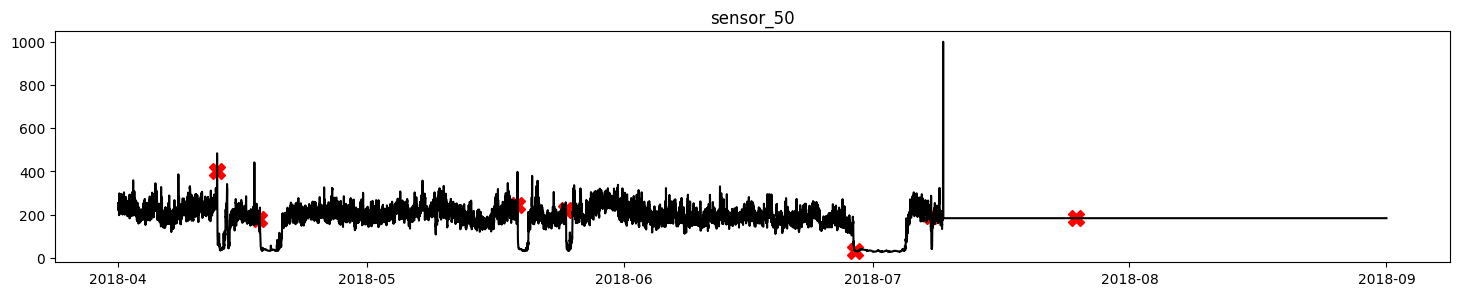

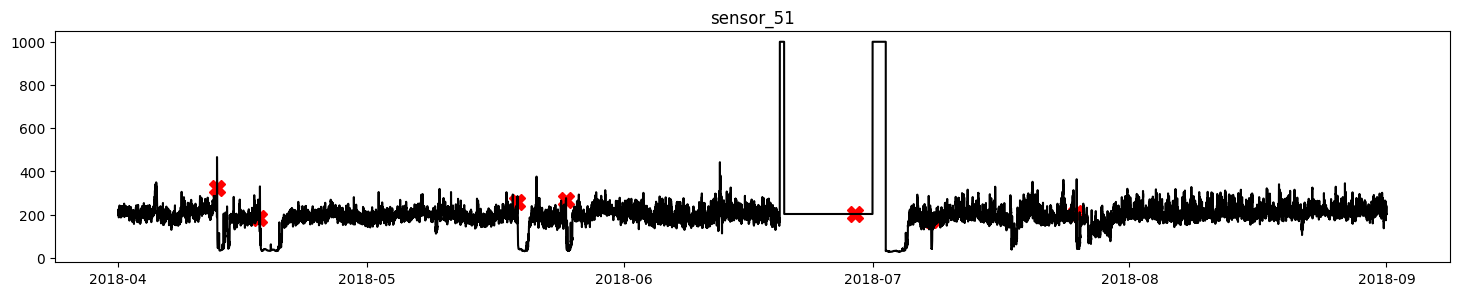

In [30]:
import matplotlib.pyplot as plt 
# Извлечь показания из НЕИСПРАВНОГО состояния насоса
broken = df[df['machine_status']=='BROKEN']
# Извлечь имена числовых столбцов
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Построить временной ряд для каждого датчика с состоянием BROKEN, отмеченным X красным цветом
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='black')
    _ = plt.title(name)
    plt.show()

Проверка на стационарность и автокорреляцию

Стационарное поведение - поведение при котором среднее значение и стандартное отклонение данных не изменяются с течением времени

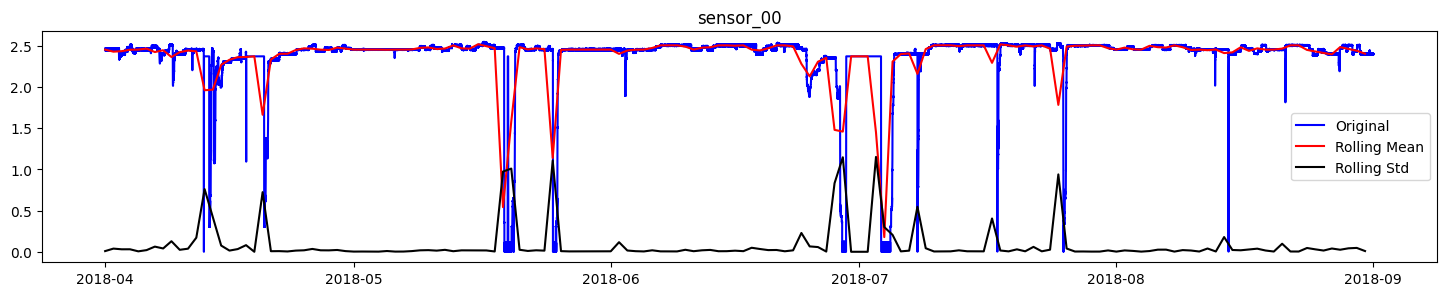

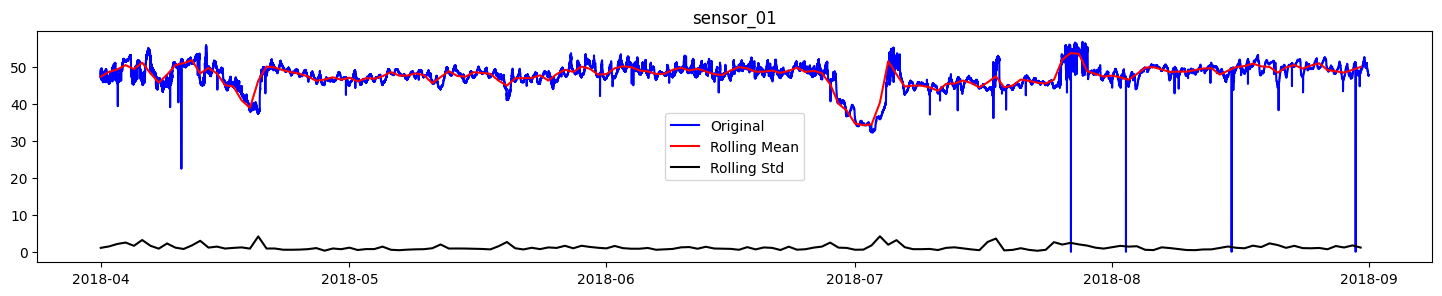

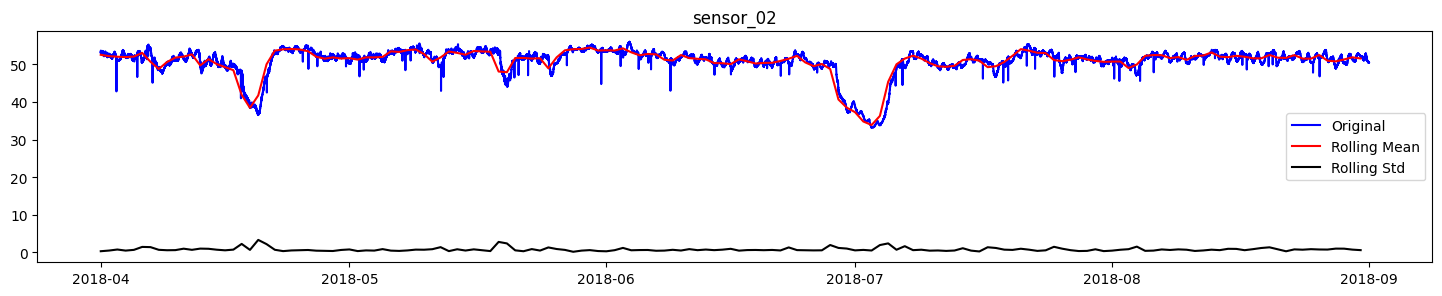

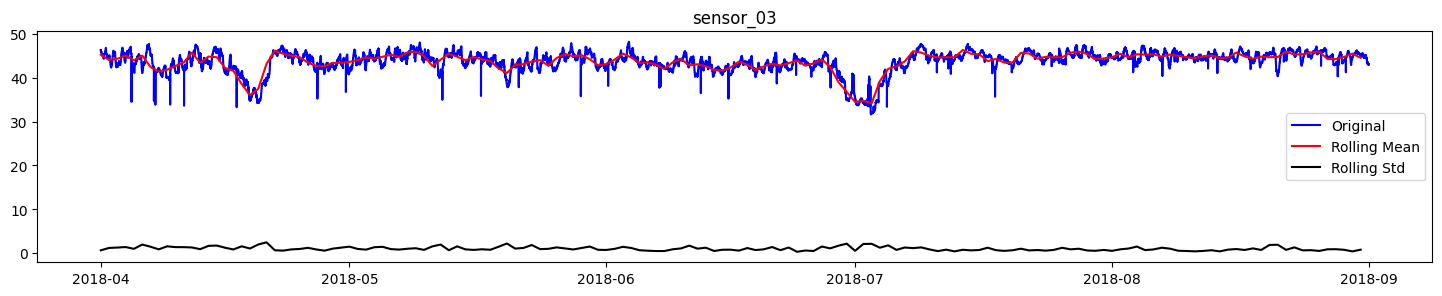

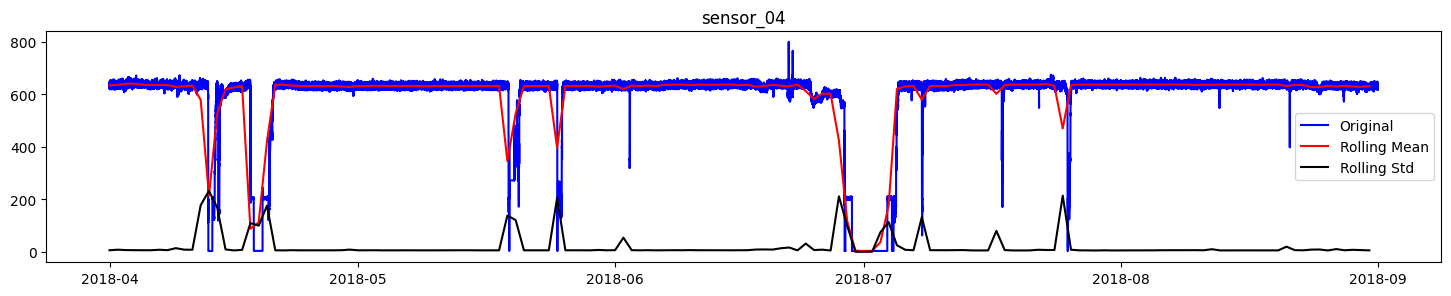

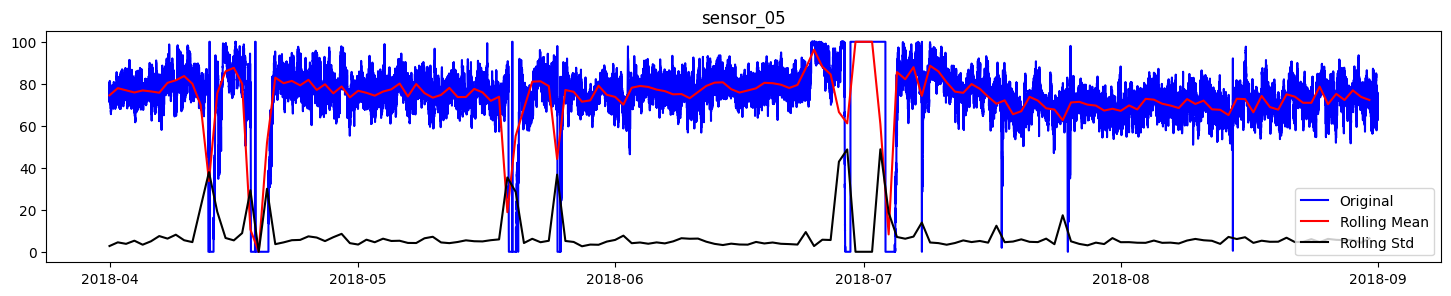

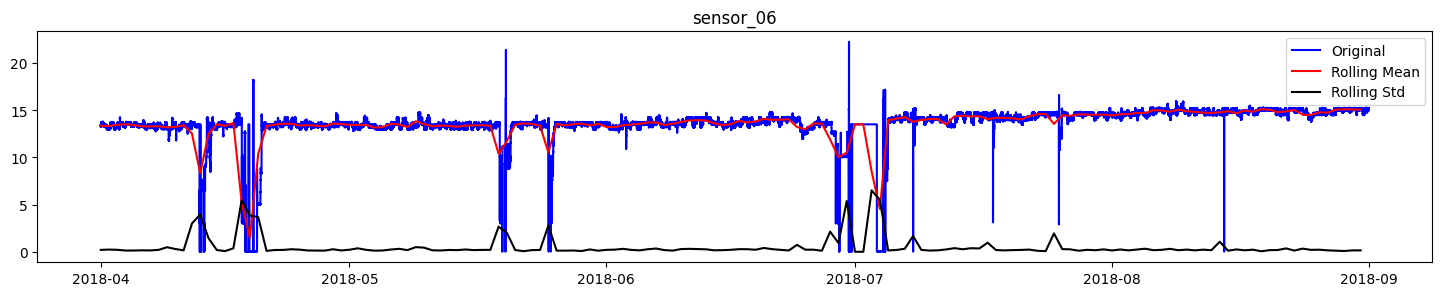

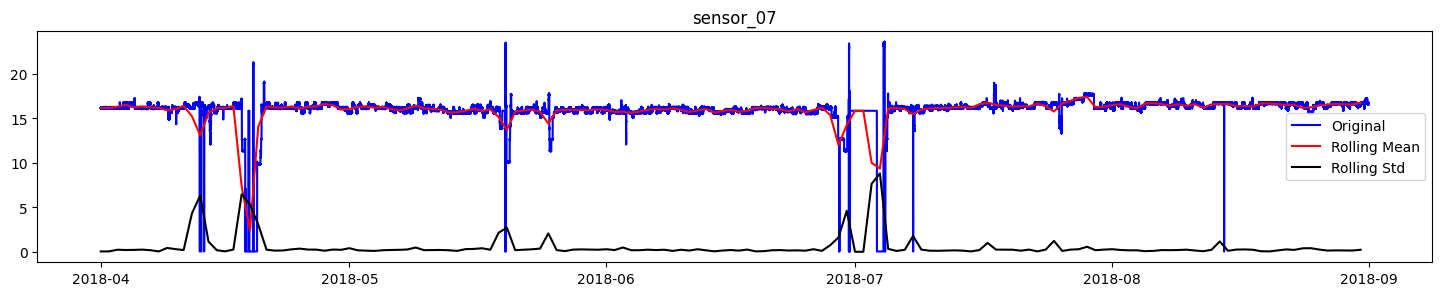

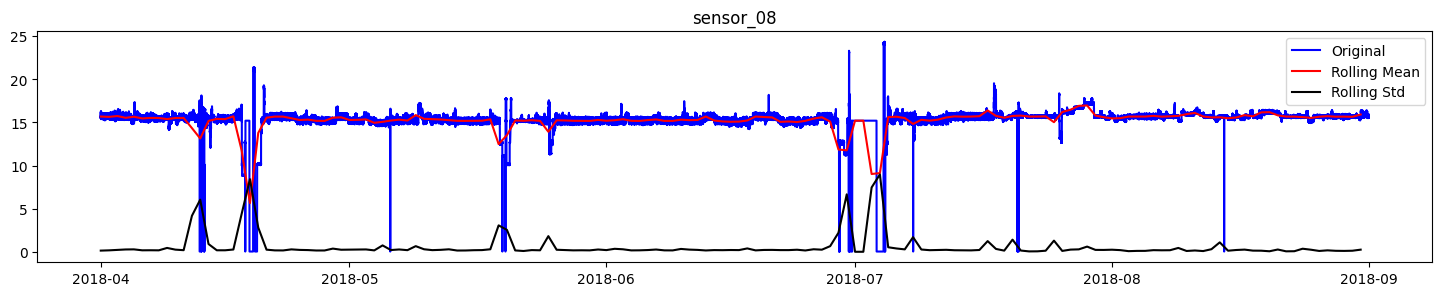

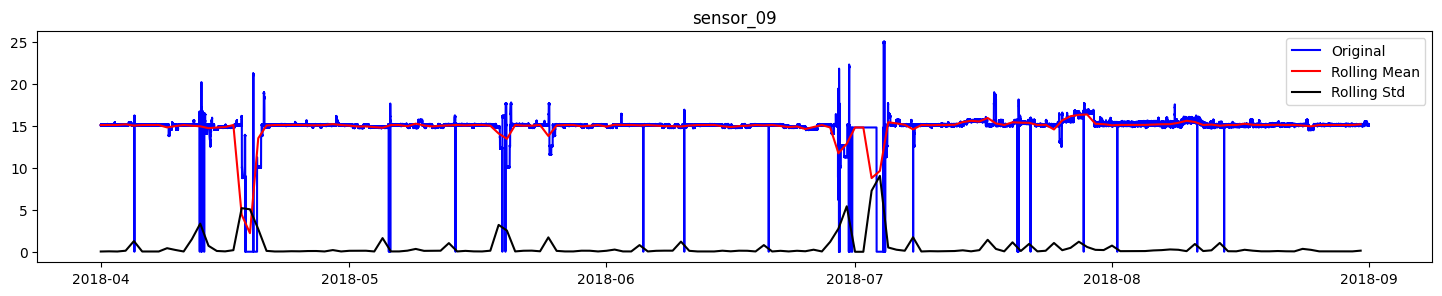

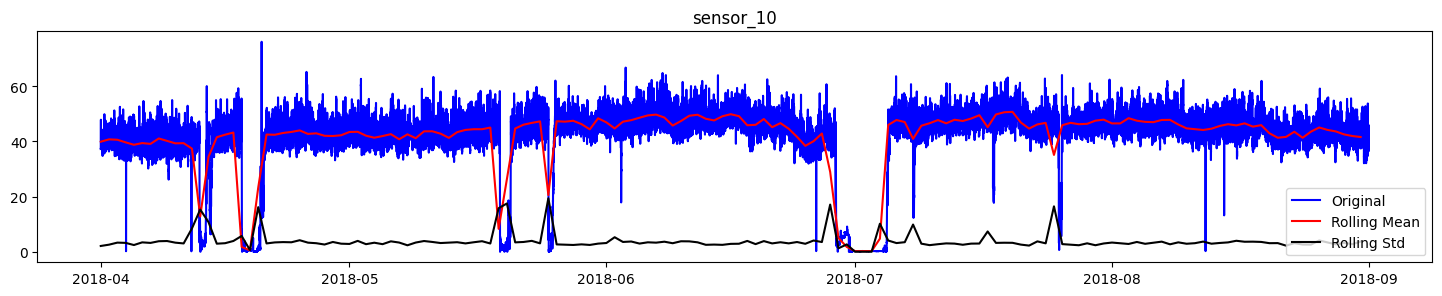

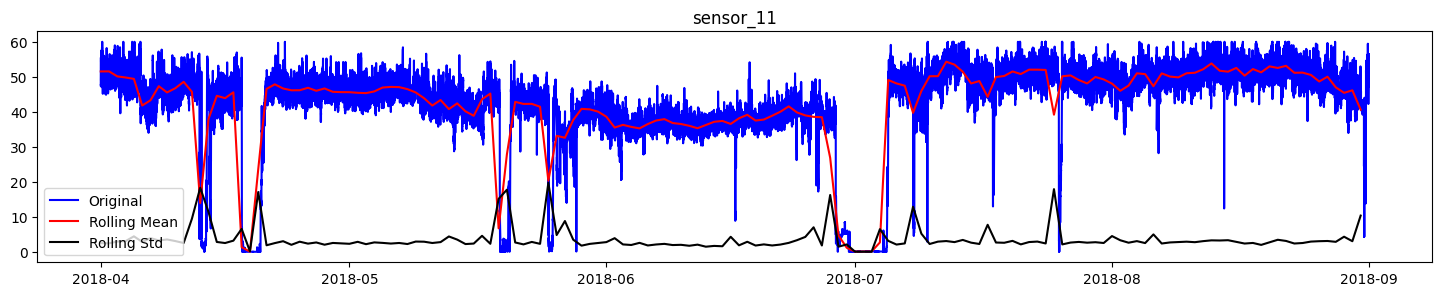

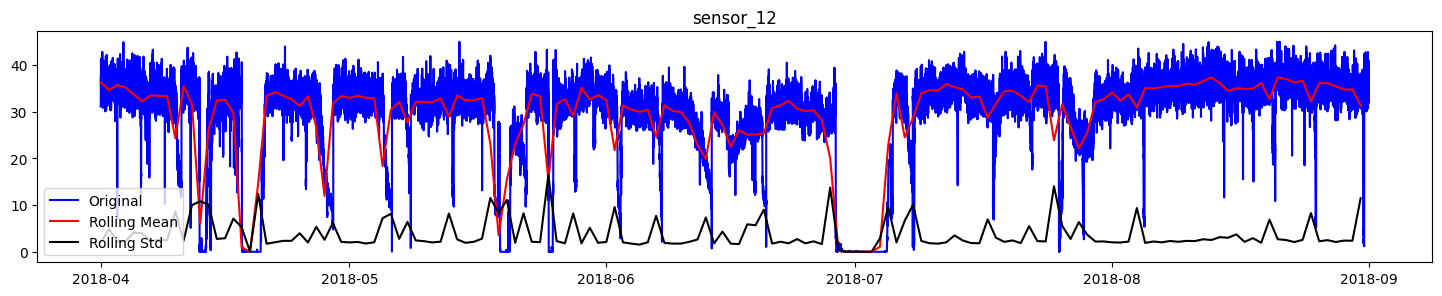

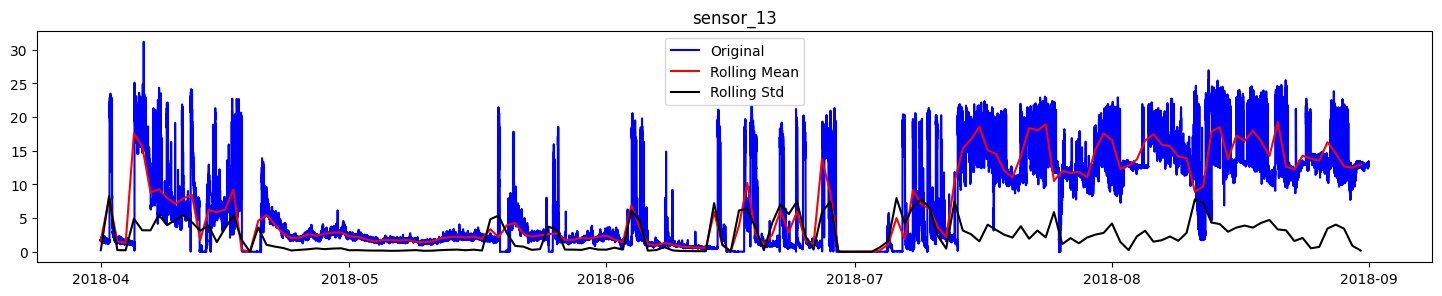

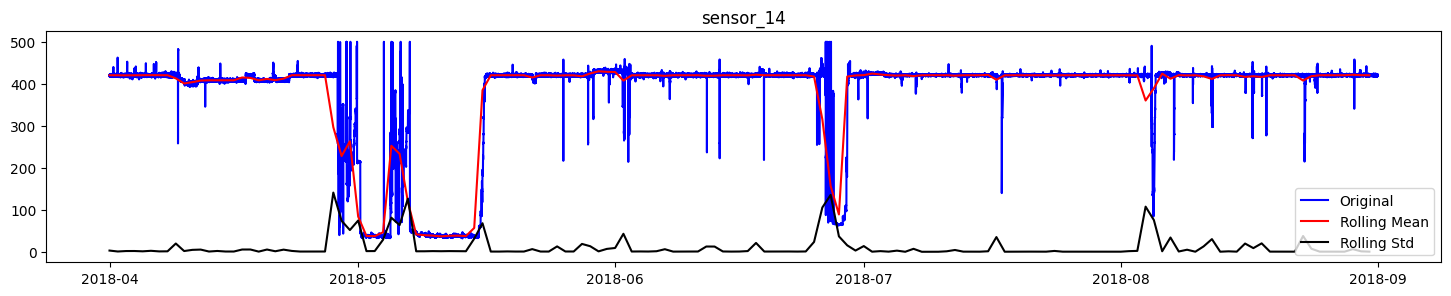

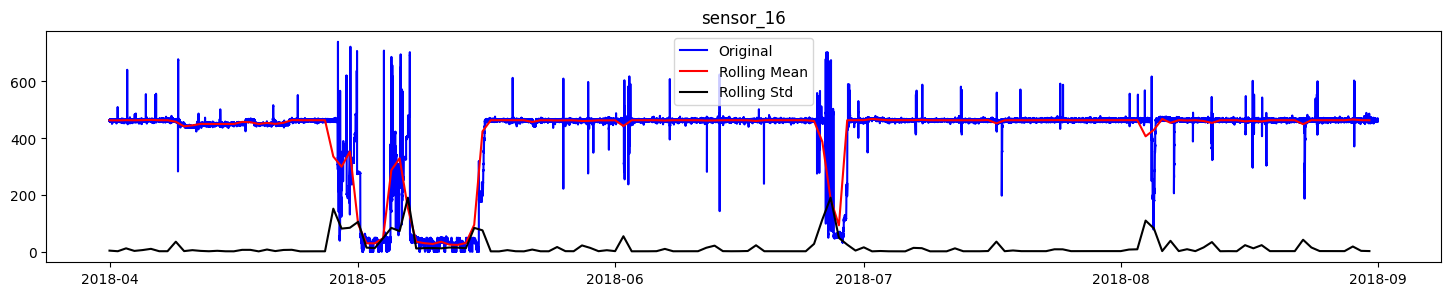

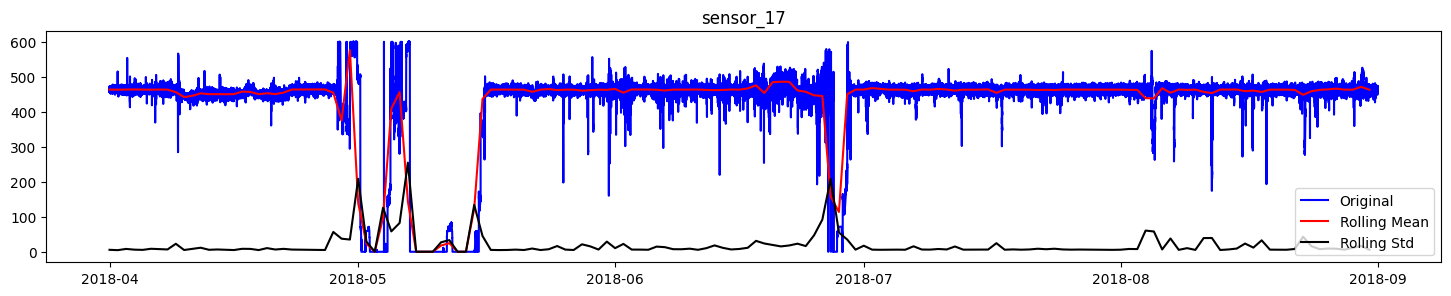

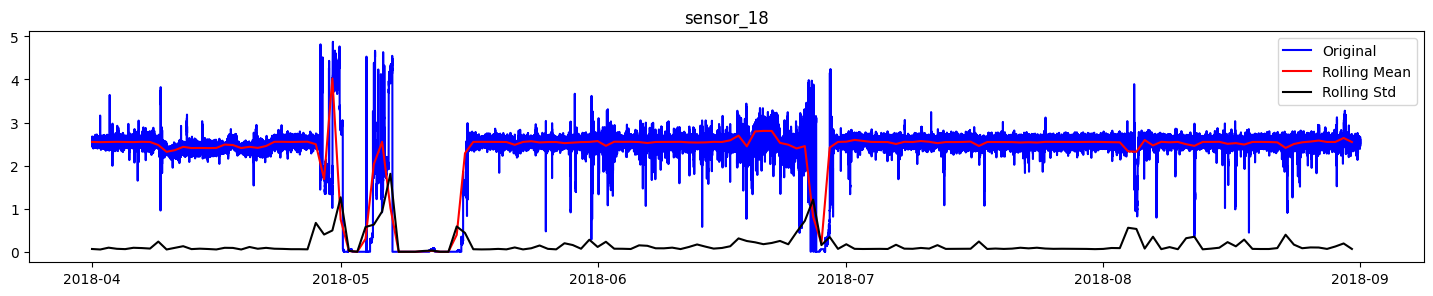

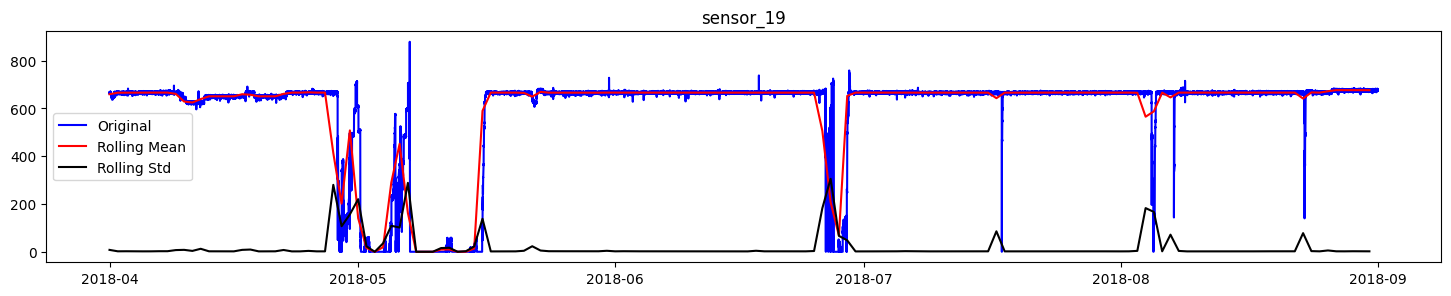

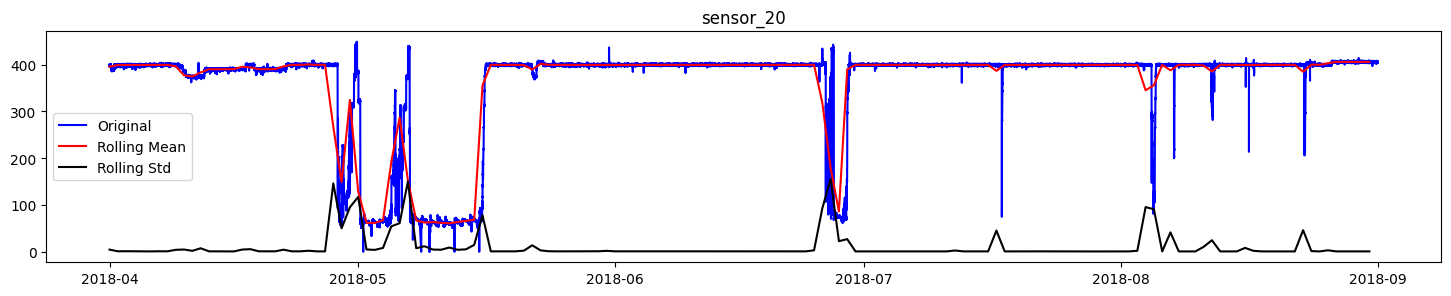

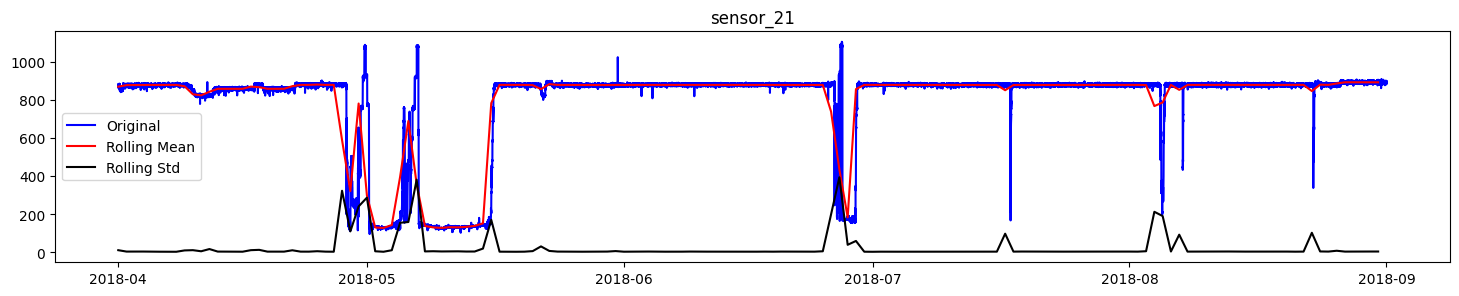

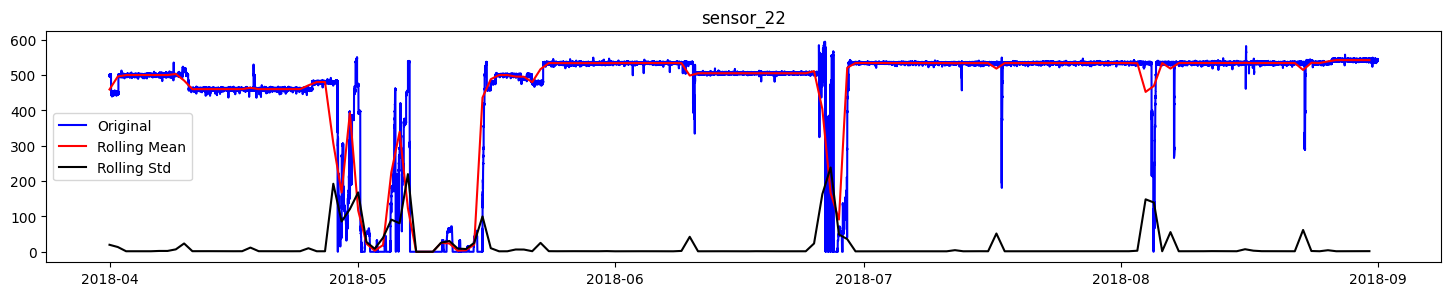

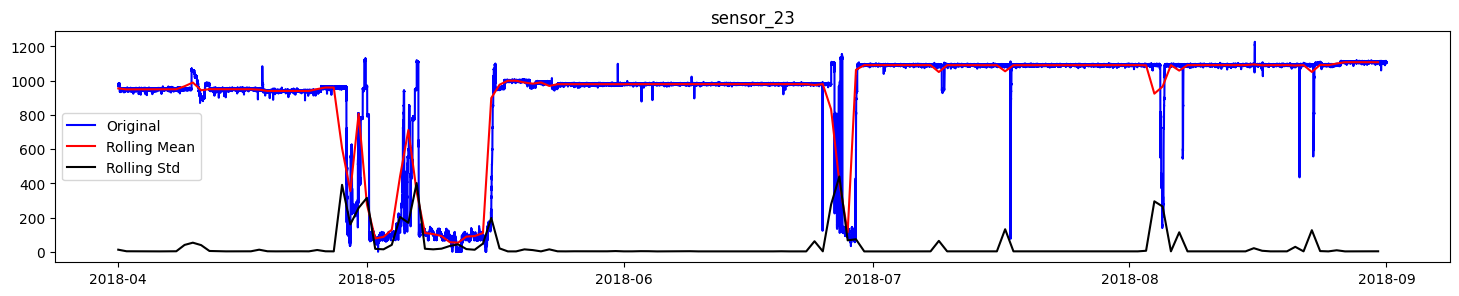

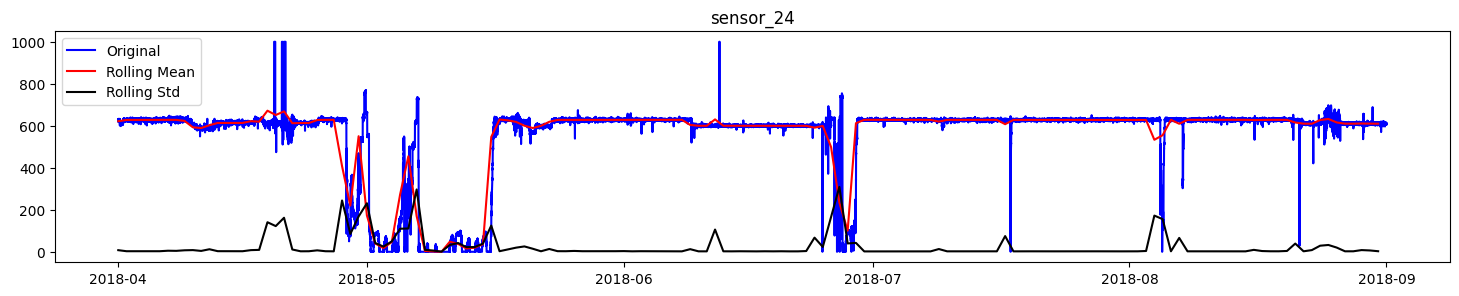

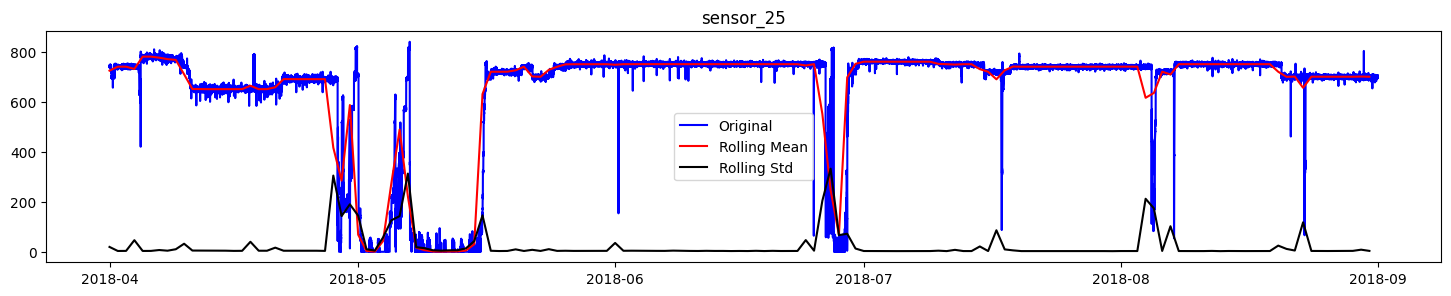

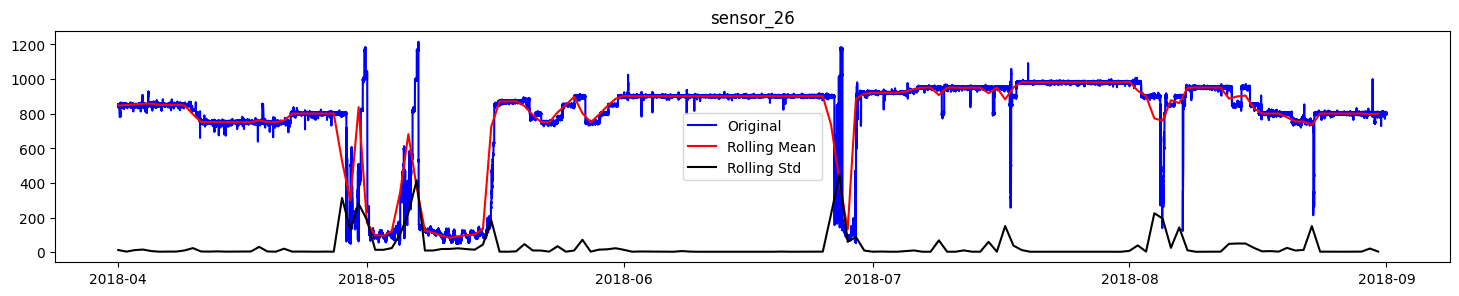

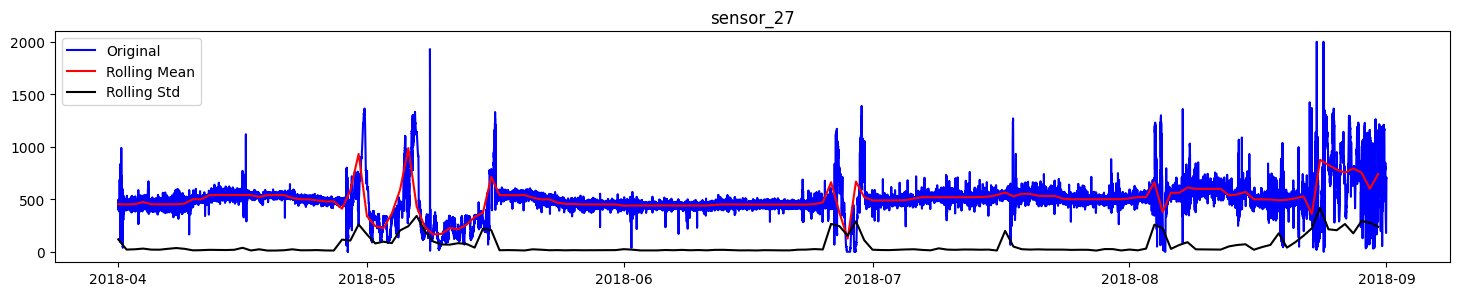

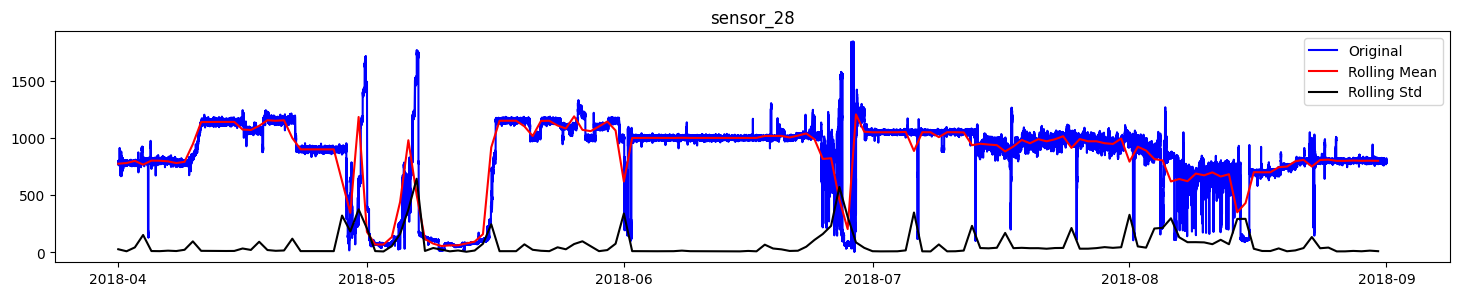

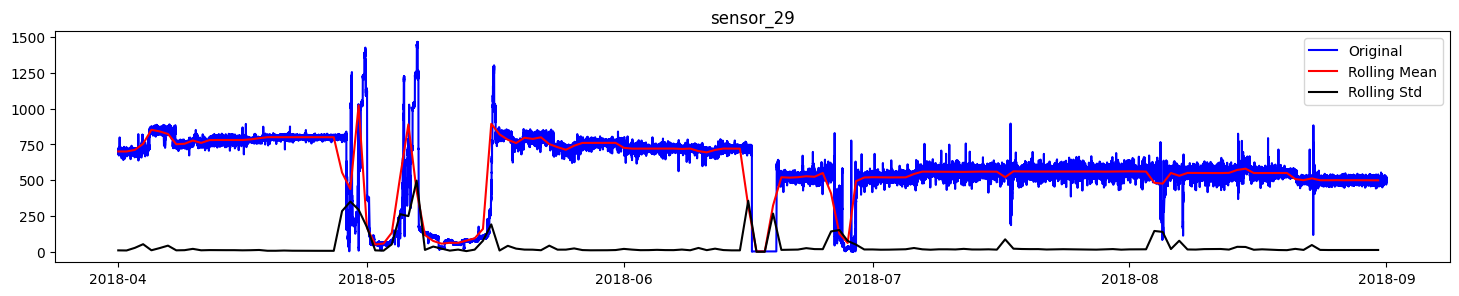

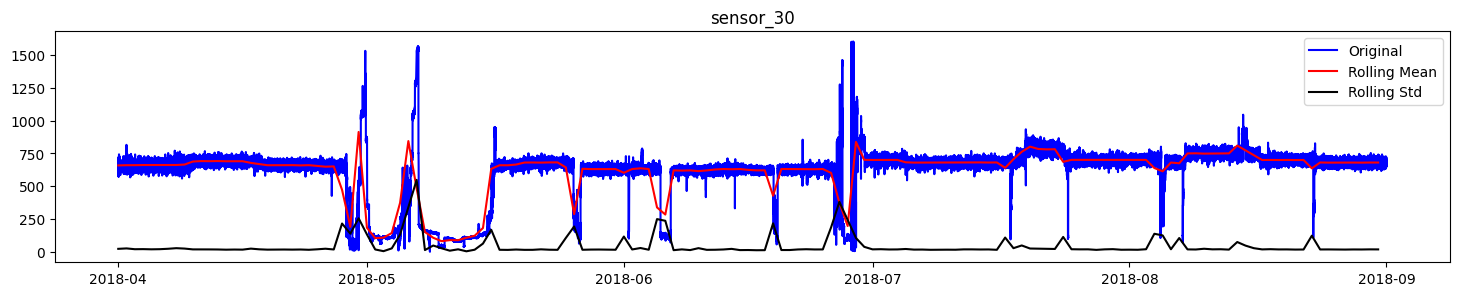

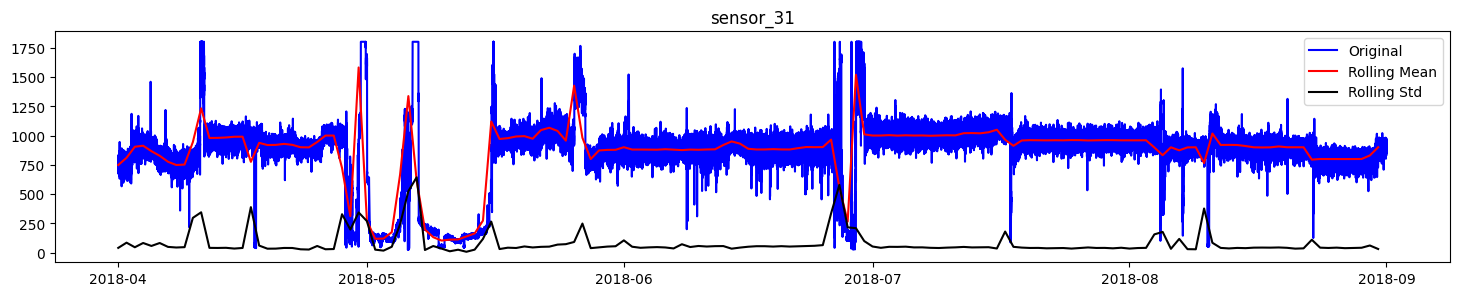

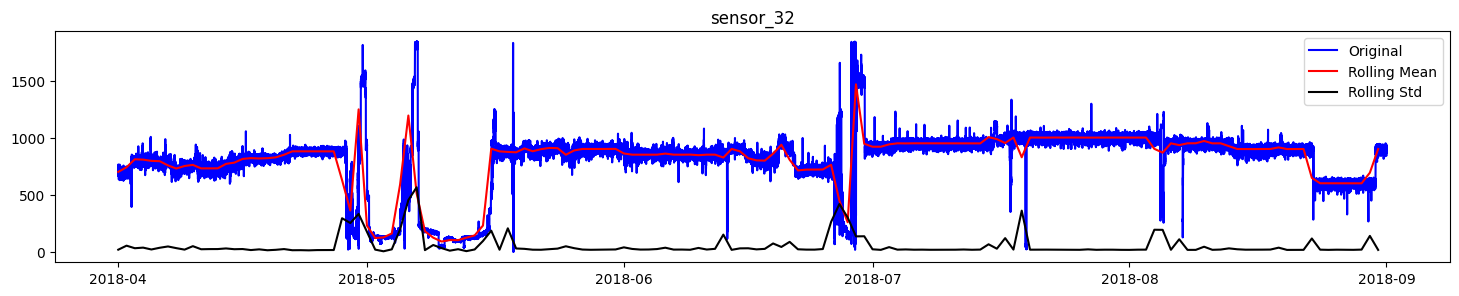

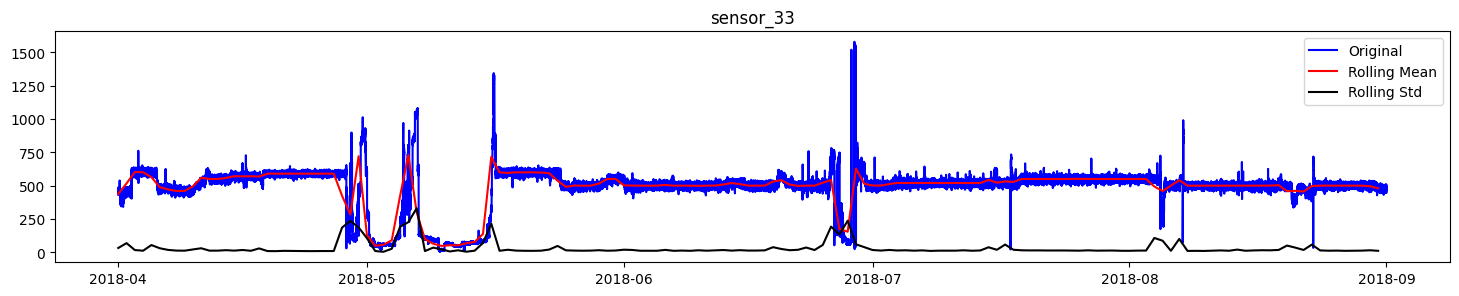

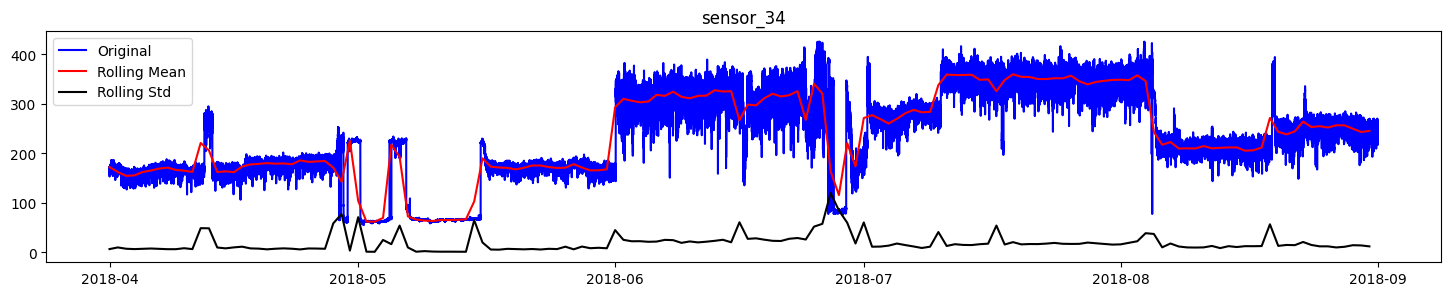

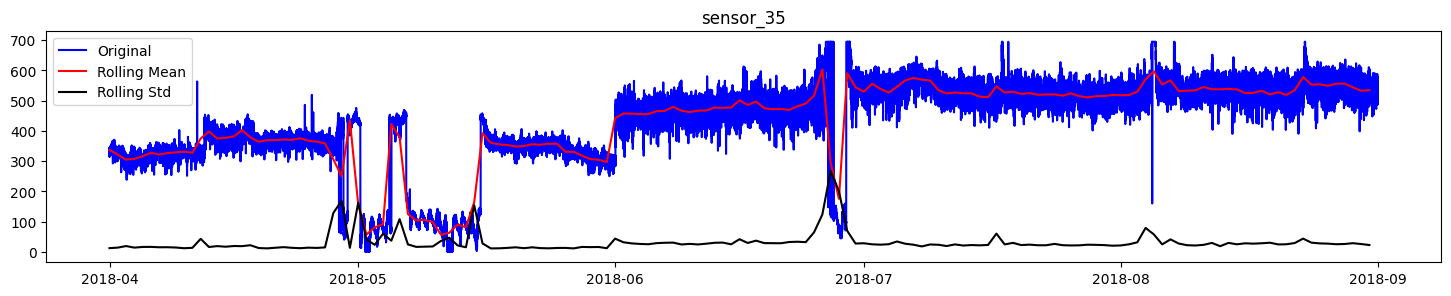

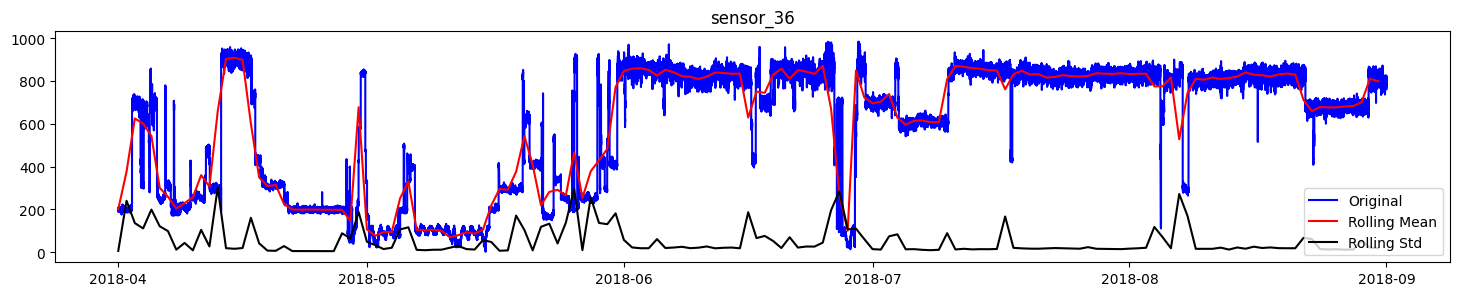

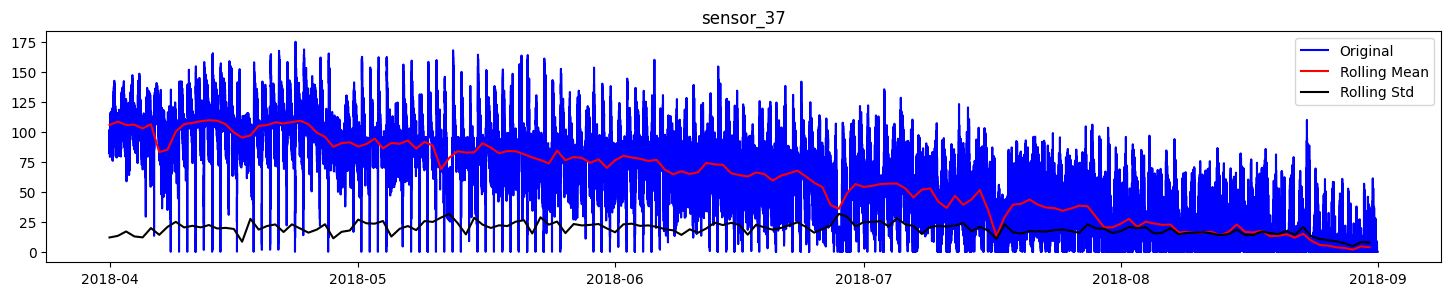

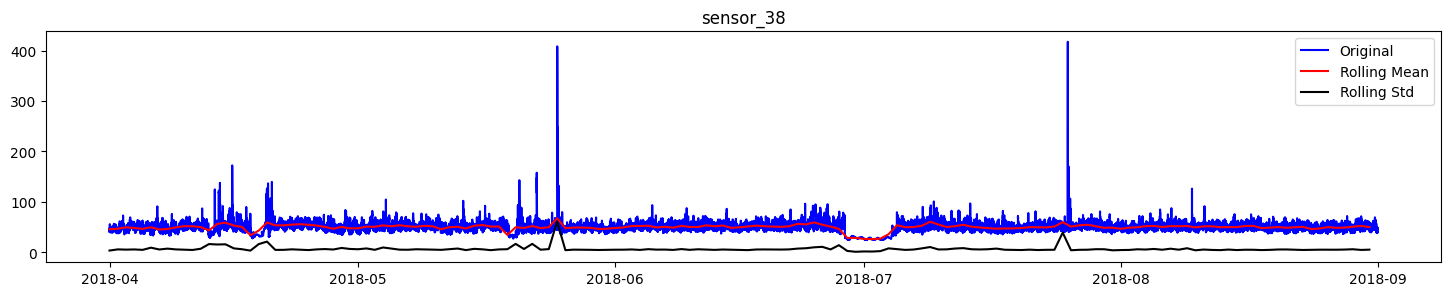

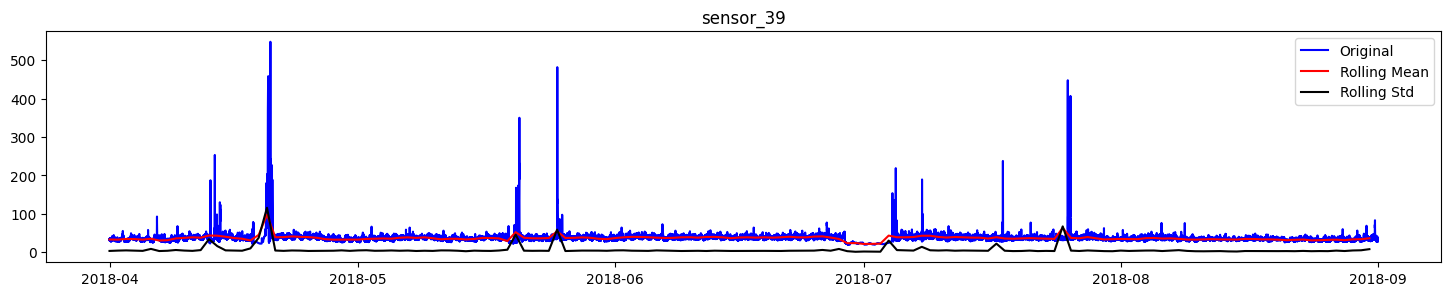

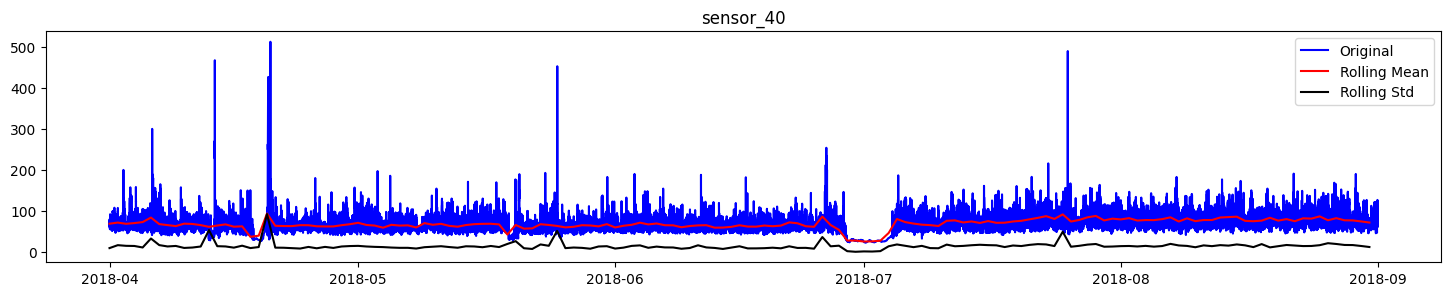

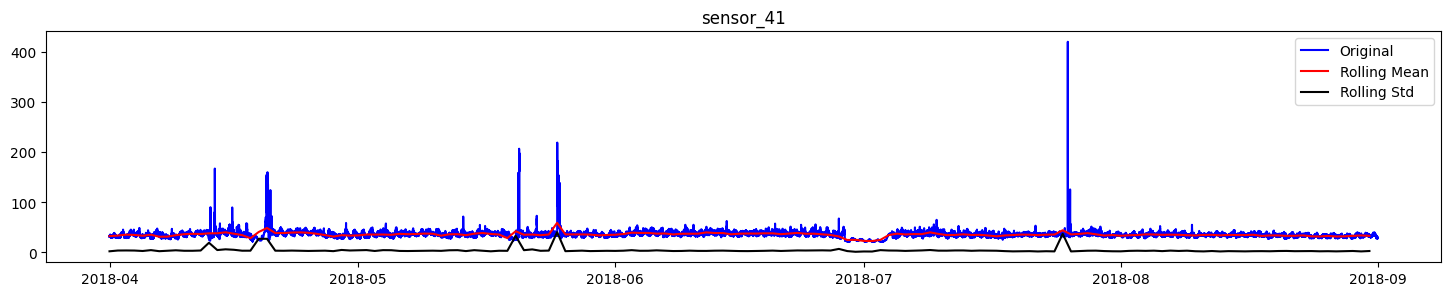

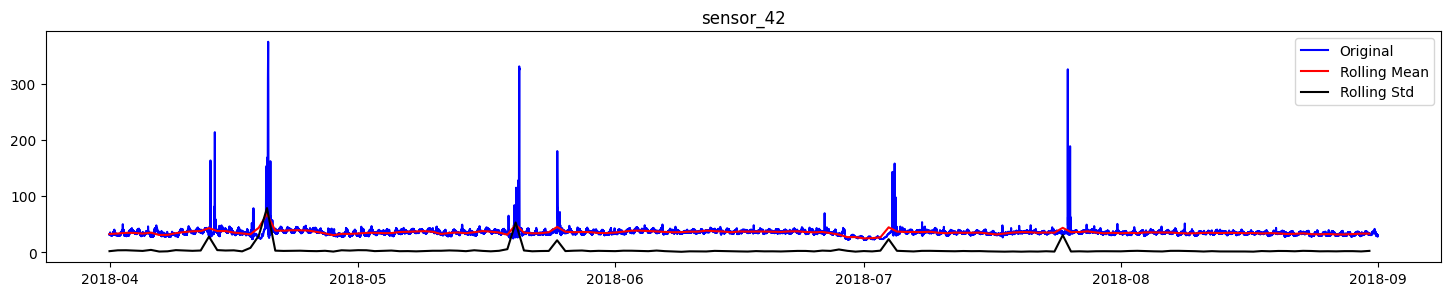

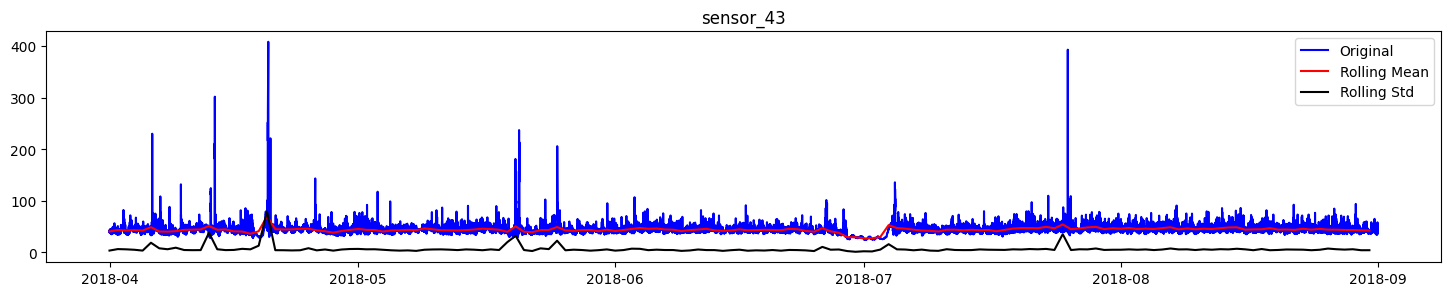

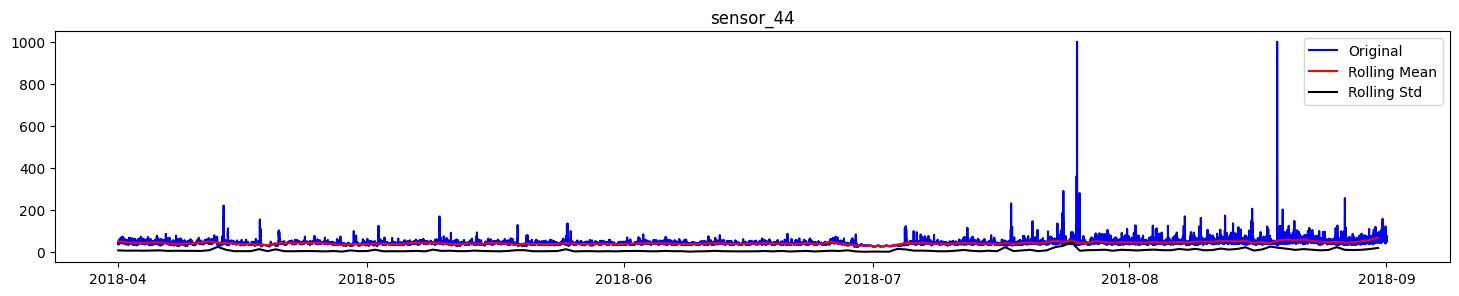

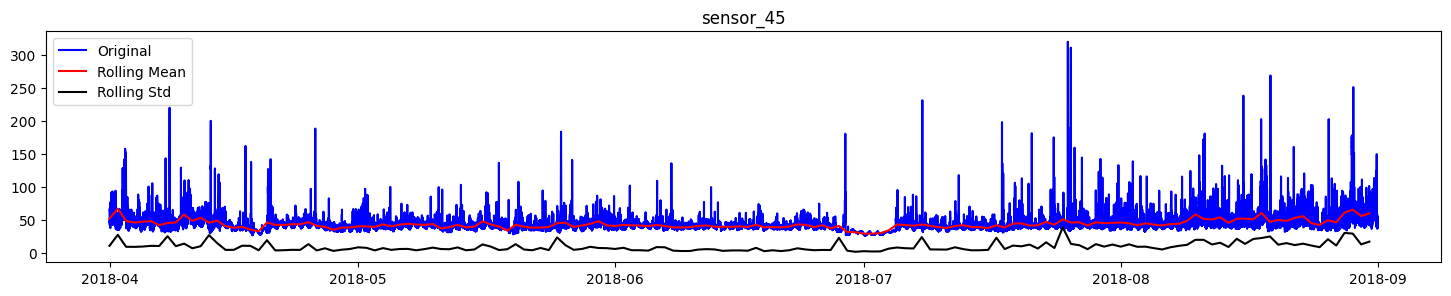

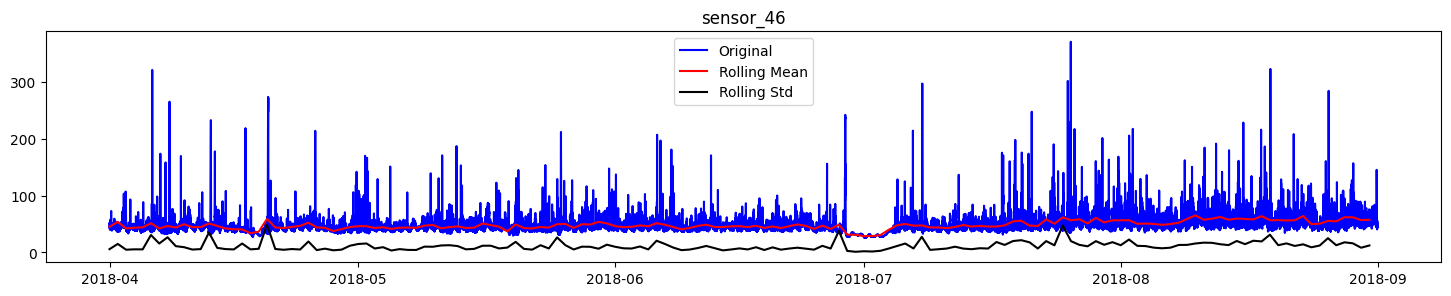

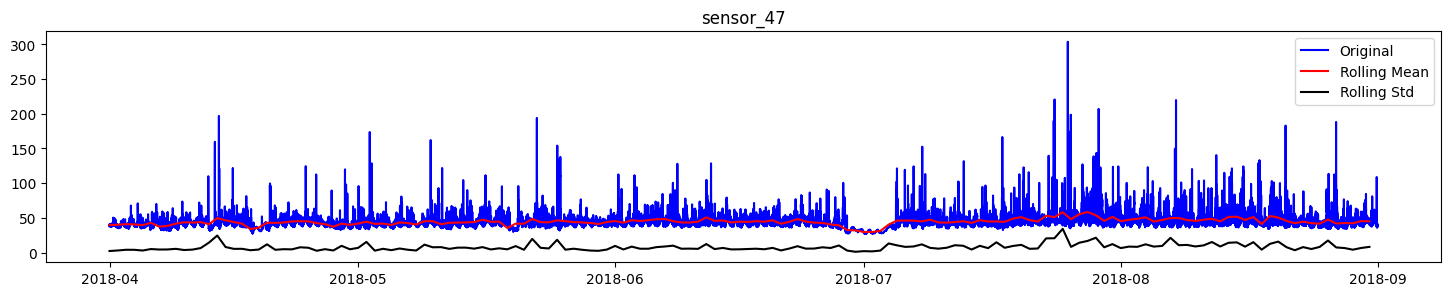

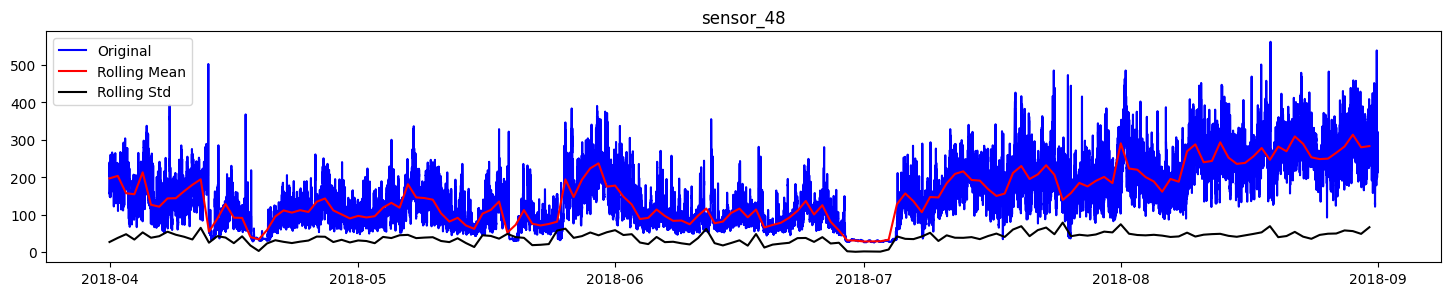

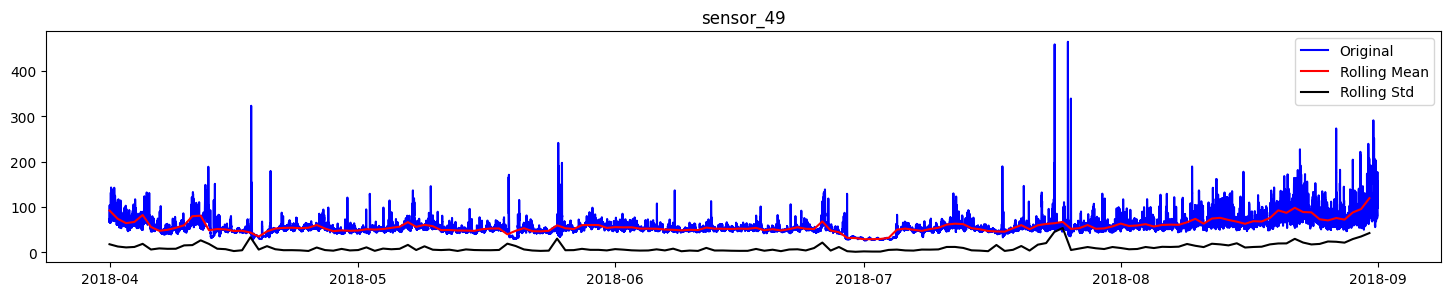

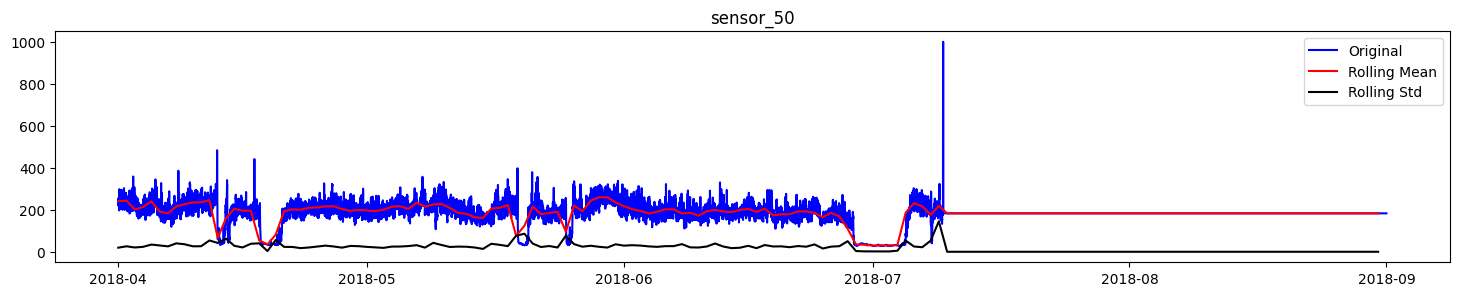

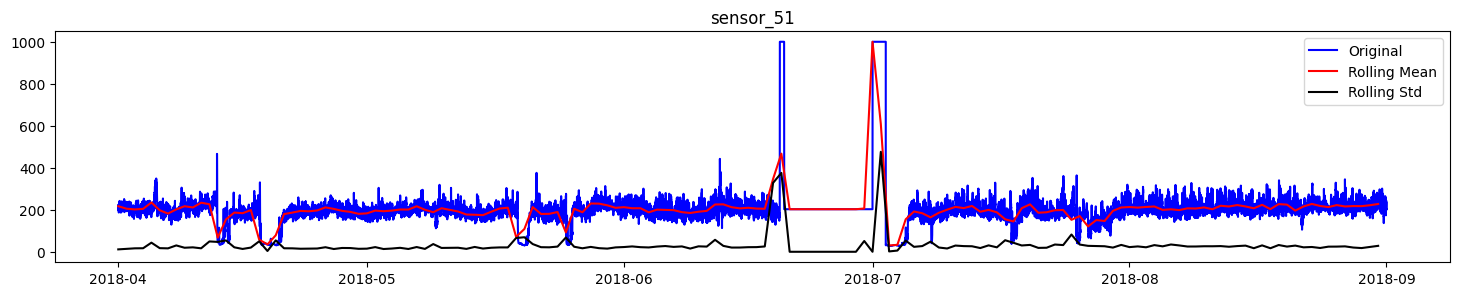

In [31]:
# Resample  всего набора данных по среднему за день
rollmean = df.resample('D').mean()
rollstd = df.resample('D').std()

# Построим временной ряд для каждого датчика с его средним значением и стандартным отклонением
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [32]:
# Записываем фрейм данных в csv
df.to_csv(path+'/sensors_with_anomaly.csv')